<a href="https://colab.research.google.com/github/machinelearnerme/MLAssignment/blob/main/ML_Fragrance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.7 MB/s eta 0:00:00


Import Libraries

In [11]:
import pandas as pd
import numpy as np
import re
from rapidfuzz import fuzz, process
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.neighbors import NearestNeighbors

Load Dataset

In [12]:
df = pd.read_csv("/content/Fragrance Dataset - COM7022 - [4037].csv")
df_unclean =df.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Fragrance Dataset - COM7022 - [4037].csv'

In [13]:
import gdown
import pandas as pd

# Google Drive file ID from the provided link
file_id = '1HJT-AQmsAXEFzKlATlgRaBGnqL4eJ86e'
output_filename = 'Fragrance_Dataset.csv'

# Download the file using gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_filename, quiet=False)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(output_filename)
df_unclean =df.copy()
df.head()


Downloading...
From: https://drive.google.com/uc?id=1HJT-AQmsAXEFzKlATlgRaBGnqL4eJ86e
To: /content/Fragrance_Dataset.csv
100%|██████████| 209k/209k [00:00<00:00, 2.32MB/s]


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,NaN,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


Initial Analysis

In [14]:
df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,NaN,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              996 non-null    float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [16]:
df.describe()

,price,available,sold
count,996.000000,889.000000,994.000000
mean,46.497279,20.046119,766.266600
std,35.590865,61.547985,3200.971733
min,3.000000,2.000000,1.000000
25%,22.990000,5.000000,14.000000
50%,35.710000,10.000000,49.500000
75%,59.000000,10.000000,320.500000
max,259.090000,842.000000,54052.000000


In [17]:
df.isna().sum()

,0
brand,1
title,0
type,3
price,4
priceWithCurrency,0
available,111
availableText,3
sold,6
lastUpdated,53
itemLocation,0


In [18]:
df.duplicated().sum()

np.int64(0)

Data PreProcessing

Fixing Price column

In [19]:
df['price_extracted'] = df['priceWithCurrency'].str.extract(r'(\d+\.?\d*)')
df['price_extracted'] = pd.to_numeric(df['price_extracted'], errors='coerce')
df['price'] = df['price'].fillna(df['price_extracted'])
df.drop(columns=['price_extracted'], inplace=True)


Fixing Type Column

In [20]:

standard_types = [
    'Eau de Parfum',
    'Eau de Toilette',
    'Eau de Cologne',
    'Aftershave',
    'Body Spray',
    'Perfume Oil',
    'Gift Set',
    'Air Freshener',
    'Pheromone Fragrance',
    'Unscented',
    'Parfum'
]

# Mapping: main type → common label keywords
mapping = {
    'Pheromone Fragrance': ['pheromone', 'feromonas','pheramones'],

    'Eau de Parfum': ['eau de parfum', r'\bedp\b', 'eau de perfume'],
    'Eau de Toilette': ['eau de toilette', r'\bedt\b', 'toilette', 'toillette'],
    'Perfume Oil': ['fragrance oil', 'body oil', 'perfume oil', 'roll on', 'roll-on'],
    'Body Spray': ['body spray', 'deodorant', 'deodorant body spray', 'fragrance body spray', 'body fragrance'],
    'Aftershave': ['aftershave', 'splash-on', 'splash on', 'after shave'],
    'Air Freshener': ['air freshener', 'car air freshener', 'room spray'],
    'Unscented': ['unscented'],
    'Eau de Cologne': ['eau de cologne', r'\bedc\b', 'cologne', 'fine cologne', 'cologne spray','colonia'],
    'Parfum': ['le parfum', 'parfum intense', 'extrait', 'elixir', r'\bparfum\b'],
    'Gift Set': ['gift set', r'\bset\b', 'box'],
    'Sample':['sample','vial','tester']

}

# Preprocess mapping: compile regex patterns for efficiency
compiled_patterns = {main: re.compile('|'.join(keywords), flags=re.IGNORECASE)
                     for main, keywords in mapping.items()}

# Function to infer type from title
def infer_type_from_title(row):
    current_type = str(row['type']).strip()
    # Only update if current type is NOT a standard perfume type
    if current_type.title() in standard_types:
        return current_type.title()
    title_text = str(row['title']).lower()
    for main_type, pattern in compiled_patterns.items():
        if pattern.search(title_text):
            return main_type
    current_type_lower = current_type.lower()
    if any(x in current_type_lower for x in ['oil', 'fragrance oil']):
        return 'Perfume Oil'
    elif 'perfume' in current_type_lower:
        return 'Parfum'
    elif current_type:  # not empty
        return current_type
    else:
        return 'Unknown'


# Apply to dataframe
df['type'] = df.apply(infer_type_from_title, axis=1)
df['type'] = df['type'].where(df['type'].map(df['type'].value_counts()) >= 2, 'Others')
df['type'].value_counts()

,count
type,
Eau de Toilette,439
Eau de Parfum,300
Eau de Cologne,120
Parfum,56
Pheromone Fragrance,40
Sample,15
Gift Set,9
Body Spray,8
Perfume Oil,6


Fixing Available Column

In [21]:


# --- Step 1: Compute mean available per type ---
df = df.dropna(subset=['availableText'])
type_means = (
    df.groupby('type', dropna=False)['available']
    .mean(numeric_only=True)
    .to_dict()
)

# --- Step 2: Prepare lowercase version of availableText for matching ---
df['availableText_lower'] = df['availableText'].astype(str).str.lower()

# --- Step 3: Create masks for specific text patterns ---
mask_limited = df['available'].isna() & df['availableText_lower'].str.contains('limited', na=False)
mask_lastone = df['available'].isna() & df['availableText_lower'].str.contains('last one', na=False)
mask_mtt = df['available'].isna() & df['availableText_lower'].str.contains('more than 10 lots', na=False)

# --- Step 4: Apply rules ---
def fill_from_type_mean(row):
    t = row.get('type', None)
    if t in type_means and not np.isnan(type_means[t]):
        return int(round(type_means[t]))
    return np.nan

# 4a. Limited → mean by type
df.loc[mask_limited, 'available'] = df.loc[mask_limited].apply(fill_from_type_mean, axis=1)

# 4b. Last One → fixed value 1
df.loc[mask_lastone, 'available'] = 1

def fill_mtt(row):
    # Extract the number of items per lot (x) from availableText
    match = re.search(r'\((\d+)\s*items per lot\)', row['availableText_lower'])
    if match:
        x = int(match.group(1))
        print(x)
        return 10 * x
    return 10  # fallback if x not found

df.loc[mask_mtt, 'available'] = df.loc[mask_mtt].apply(fill_mtt, axis=1)
# --- Step 5: Clean up helper column ---
df.drop(columns=['availableText_lower'], inplace=True)

# --- Step 6: Report summary ---
print(f"✅ Filled {mask_limited.sum()} rows with type mean (keyword: 'Limited').")
print(f"✅ Filled {mask_lastone.sum()} rows with value 1 (keyword: 'Last One').")
print(f"✅ Filled {mask_mtt.sum()} rows with 10x per lot (keyword: 'More than 10 lots').")
print(f"Remaining missing values in 'available': {df['available'].isna().sum()}")


3
10
✅ Filled 59 rows with type mean (keyword: 'Limited').
✅ Filled 47 rows with value 1 (keyword: 'Last One').
✅ Filled 2 rows with 10x per lot (keyword: 'More than 10 lots').
Remaining missing values in 'available': 0


Dropping Empty Sold rows

In [22]:
df = df.dropna(subset=['sold']).reset_index(drop=True)

Fixing Brand Column

In [23]:

df = df.dropna(subset=['brand'])
unique_brands = df['brand'].unique()
normalized = {}

# Exceptions to preserve as-is
exceptions = {
    "zara": "Zara",
    "lalique": "Lalique",
    "emporio armani": "Emporio Armani",
    "giorgio armani": "Giorgio Armani",
    "HERMÃˆS" :"Hermes"
}

# Known aliases mapping
aliases = {
    "ck": "Calvin Klein",
    "calvinklein": "Calvin Klein",
    "montblanc": "Montblanc",
    "mont blanc": "Montblanc",
    "guerlainparis": "Guerlain",
    "roja":"Roja Parfums",
    "roja dove" :"Roja Parfums",
    "ysl" :"Yves Saint Laurent",
    "christian dior": "Dior",
    "polo" : "Raulph Lauren"


}

def safe_clean(text):
    """Lowercase, strip, remove special characters (except &)"""
    if pd.isna(text):
        return ""
    text = str(text).lower().strip()
    text = re.sub(r'[^\w\s&]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)
    return text

for brand in unique_brands:
    brand_clean = safe_clean(brand)
    brand_alias = brand_clean.replace(" ", "")  # for alias matching

    # 0️⃣ If contains 'cologne', 'fragrance', or 'show' → Unbranded
    normalized[brand] = "Unbranded" if any(k.lower() in brand_clean.lower() for k in ["cologne", 'pheromones',"fragrance", "show", "2nd to none", "luxury", "does", "coty", "king", "secertmu"]) else brand
    continue

    # 1️⃣ Preserve exceptions
    if brand_clean in exceptions:
        normalized[brand] = exceptions[brand_clean]
        continue

    # 2️⃣ Check known aliases
    if brand_alias in aliases:
        normalized[brand] = aliases[brand_alias]
        continue

    # 3️⃣ Fuzzy match with already normalized brands
    existing_clean_keys = [safe_clean(b) for b in normalized.keys()]
    if existing_clean_keys:
        result = process.extractOne(brand_clean, existing_clean_keys, scorer=fuzz.token_sort_ratio)
        if result and result[1] > 60:  # adjust threshold as needed
            matched_lower = result[0]
            matched_original = next(b for b in normalized.keys() if safe_clean(b) == matched_lower)
            normalized[brand] = normalized[matched_original]
            continue

    # 4️⃣ Default: use itself
    normalized[brand] = brand

# Apply mapping to dataframe
df["brand"] = df["brand"].map(normalized)


df = df.dropna(subset=['brand'])
unique_brands = df['brand'].unique()
normalized = {}

# Exceptions to preserve as-is
exceptions = {
    "zara": "Zara",
    "lalique": "Lalique",
    "emporio armani": "Emporio Armani",
    "giorgio armani": "Giorgio Armani",
    "HERMÃˆS" :"Hermes"
}

# Known aliases mapping
aliases = {
    "ck": "Calvin Klein",
    "calvinklein": "Calvin Klein",
    "montblanc": "Montblanc",
    "mont blanc": "Montblanc",
    "guerlainparis": "Guerlain",
    "roja":"Roja Parfums",
    "roja dove" :"Roja Parfums",
    "ysl" :"Yves Saint Laurent",
    "christian dior": "Dior",
    "polo" : "Raulph Lauren"


}

def safe_clean(text):
    """Lowercase, strip, remove special characters (except &)"""
    if pd.isna(text):
        return ""
    text = str(text).lower().strip()
    text = re.sub(r'[^\w\s&]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)
    return text

for brand in unique_brands:
    brand_clean = safe_clean(brand)
    brand_alias = brand_clean.replace(" ", "")  # for alias matching
    '''
    # 0️⃣ If contains 'cologne', 'fragrance', or 'show' → Unbranded
    if any(keyword in brand_clean for keyword in ["cologne", "fragrance", "show", "2nd to none", "luxury", "does","coty", "king"]):
        normalized[brand] = "Unbranded"
        continue

    '''
    # 0️⃣ If contains 'cologne', 'fragrance', or 'show' → Unbranded
    normalized[brand] = "Unbranded" if any(k.lower() in brand_clean.lower() for k in ["cologne", 'pheromones',"fragrance", "show", "2nd to none", "luxury", "does", "coty", "king", "secertmu"]) else brand
    continue

    # 1️⃣ Preserve exceptions
    if brand_clean in exceptions:
        normalized[brand] = exceptions[brand_clean]
        continue

    # 2️⃣ Check known aliases
    if brand_alias in aliases:
        normalized[brand] = aliases[brand_alias]
        continue

    # 3️⃣ Fuzzy match with already normalized brands
    existing_clean_keys = [safe_clean(b) for b in normalized.keys()]
    if existing_clean_keys:
        result = process.extractOne(brand_clean, existing_clean_keys, scorer=fuzz.token_sort_ratio)
        if result and result[1] > 60:  # adjust threshold as needed
            matched_lower = result[0]
            matched_original = next(b for b in normalized.keys() if safe_clean(b) == matched_lower)
            normalized[brand] = normalized[matched_original]
            continue

    # 4️⃣ Default: use itself
    normalized[brand] = brand

# Apply mapping to dataframe
df["brand_cleaned"] = df["brand"].map(normalized)
#df.to_csv("cleaned_dataset.csv", index=False)


In [24]:

# Lowercase titles for easier matching
title_lower = df['title'].str.lower()

# Boolean masks for each rule
mask_creed = title_lower.str.contains(r'a[\s\-]*v[\s\-]*entus|aventus|millesime', regex=True)
mask_dior = title_lower.str.contains(r'sauvage|christian', regex=True)
mask_ysl  = title_lower.str.contains(r'ysl|y[\*\s]*s[\*\s]*l', regex=True)
mask_fah  = title_lower.str.contains(r'fahrenheit', regex=True)
mask_mai  = title_lower.str.contains(r'maison margiela', regex=True)
mask_cup  = title_lower.str.contains(r'cupid', regex=True)



# Apply rules
df['brand_cleaned'] = np.select(
    [mask_creed, mask_dior, mask_ysl,mask_fah, mask_mai, mask_cup],
    ['Creed', 'Dior', 'Yves Saint Laurent','Fahrenheit','Maison Margiela', 'Cupid'],
    default=df['brand_cleaned']
)

In [25]:
df = df.dropna(subset=['brand']).reset_index(drop=True)
df = df[df['brand_cleaned'].str.strip() != '']
df = df[df['title'].str.len() > 10].reset_index(drop=True)
print(f"Initial rows: {len(df)}")

# -------------------------------
# 2. EXTRACT BRAND FROM TITLE (Fuzzy Logic, 70% threshold)
# -------------------------------
def extract_brand_from_title(title, brand_list, threshold=65):
    title_lower = title.lower()
    # Try exact match first
    for brand in brand_list:
        if brand.lower() in title_lower:
            return brand



    # Fuzzy match

    res = process.extractOne(title_lower, brand_list, scorer=fuzz.token_sort_ratio)
    if res:
        best_match = res[0]  # always safe
        score = res[1] if len(res) > 1 else 100
        if score >= threshold:
            return best_match
'''

    best_match, score = process.extractOne(title_lower, brand_list, scorer=fuzz.token_sort_ratio)
    if score >= threshold:
        return best_match
    return None
'''
# Get unique brands from brand column
known_brands = df['brand_cleaned'].str.strip().unique().tolist()

# Apply fuzzy extraction
df['brand_from_title'] = df['title'].apply(
    lambda x: extract_brand_from_title(x, known_brands, threshold=65)
)

# -------------------------------
# 3. CREATE CORRECTED BRAND COLUMN
# -------------------------------
def correct_brand(row):
    if pd.notna(row['brand_from_title']):
        return row['brand_from_title']
    return row['brand_cleaned']  # fallback to original

df['brand_corrected'] = df.apply(correct_brand, axis=1)

# Normalize
def normalize_brand(b):
    b = b.strip().lower()
    mapping = {
        'giorgio armani': 'armani',
        'dolce&gabbana': 'dolce gabbana',
        'paco rabanne': 'rabanne',
        'calvin klein': 'ck',
        'ralph lauren': 'lauren',
        'christian dior': 'dior',
    }
    return mapping.get(b, b)

df['brand_clean'] = df['brand_corrected'].apply(normalize_brand)

# Filter rare brands
brand_counts = df['brand_clean'].value_counts()
invalid_brands = brand_counts[brand_counts == 1].index
valid_brands = brand_counts[brand_counts > 1].index
df_invalid = df[df['brand_clean'].isin(invalid_brands)].copy()
df = df[df['brand_clean'].isin(valid_brands)].copy()

print(f"After fuzzy correction & filtering: {len(df)} rows, {df['brand_clean'].nunique()} brands")
print(f"Brands corrected: {(df['brand_corrected'] != df['brand_cleaned']).sum()}")

# -------------------------------
# 4. CLEAN TITLE
# -------------------------------
def clean_title(text):
    text = text.lower()
    text = re.sub(r'\b(\d+\.?\d*\s*(oz|ml|fl\s*oz))\b', '', text)
    text = re.sub(r'\b(new|sealed|tester|box|men|man|pour homme|authentic|genuine)\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['title_clean'] = df['title'].apply(clean_title)

# -------------------------------
# 5. TRAIN SUPERVISED MODEL
# -------------------------------
X = df['title_clean']
y = df['brand_clean']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=2,
    max_df=0.95,
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nMODEL ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")

# -------------------------------
# 6. PREDICT ON FULL DATASET → brand_predicted
# -------------------------------
X_full_tfidf = vectorizer.transform(df['title_clean'])
df['brand_predicted'] = model.predict(X_full_tfidf)

# Convert back to original casing
brand_mapping = df.drop_duplicates('brand_clean').set_index('brand_clean')['brand_corrected'].to_dict()
df['brand_predicted_display'] = df['brand_predicted'].map(brand_mapping).fillna(df['brand_predicted'])

def override_prediction_if_brand_in_title(row):
    brand_corr_lower = str(row['brand_corrected']).lower()
    title_lower = str(row['title']).lower()

    # Ensure 'unbranded' is not considered a valid brand for this override
    if brand_corr_lower != 'unbranded' and brand_corr_lower in title_lower:
        return row['brand_corrected']
    else:
        return row['brand_predicted_display']

df['brand_predicted_display'] = df.apply(override_prediction_if_brand_in_title, axis=1)

# -------------------------------
# 7. SAVE RESULTS
# -------------------------------
# Final dataset with new columns
output_cols = ['title', 'brand', 'brand_from_title', 'brand_corrected', 'brand_clean', 'brand_predicted', 'brand_predicted_display']
df_final = df[output_cols].copy()
df_final.to_csv("cleaned_ML_Dataset_with_brands.csv", index=False)

# Save model
#joblib.dump(model, "/content/outputs/brand_predictor_model.pkl")
#joblib.dump(vectorizer, "/content/outputs/brand_tfidf_vectorizer.pkl")
#joblib.dump(brand_mapping, "/content/outputs/brand_display_mapping.pkl")


print("Full dataset with predicted brands saved!")
print(f"Sample corrections:")
print(df_final[['title', 'brand', 'brand_corrected', 'brand_predicted_display']].head(10).to_string(index=False))

# -------------------------------
# 8. CONFUSION MATRIX (Top 10)
# -------------------------------


Initial rows: 993
After fuzzy correction & filtering: 922 rows, 107 brands
Brands corrected: 158

MODEL ACCURACY: 0.8811 (88.11%)
Full dataset with predicted brands saved!
Sample corrections:
                                                                           title           brand brand_corrected brand_predicted_display
                         Christian Dior Sauvage Men's EDP 3.4 oz Fragrance Spray            Dior            Dior                    Dior
  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime EDP Col-ogne for Men New In Box       Unbranded           Creed                   Creed
                                                HOGO BOSS cologne For Men 3.4 oz       Unbranded       Unbranded               HUGO BOSS
Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau De Toilette Spray Men' New & Sealed  Giorgio Armani  Giorgio Armani          Giorgio Armani
       Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 oz Fragrances 6291108734056         Lattafa         Lattafa           

In [26]:
df['brand'] = df['brand_predicted_display']
df.drop(columns=['priceWithCurrency','title','lastUpdated','availableText','brand_corrected','brand_clean','title_clean','brand_predicted','brand_predicted_display','brand_cleaned','brand_from_title'], inplace=True)
df_invalid.drop(columns=['priceWithCurrency','title','lastUpdated','availableText','brand_corrected','brand_clean','brand_cleaned','brand_from_title'], inplace=True)
df = pd.concat([df, df_invalid], ignore_index=True)

In [27]:

df.isna().sum()

,0
brand,0
type,0
price,0
available,0
sold,0
itemLocation,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         993 non-null    object 
 1   type          993 non-null    object 
 2   price         993 non-null    float64
 3   available     993 non-null    float64
 4   sold          993 non-null    float64
 5   itemLocation  993 non-null    object 
dtypes: float64(3), object(3)
memory usage: 46.7+ KB


In [29]:
# This cell was a duplicate of the previous brand cleaning logic and has been removed for efficiency.

In [30]:
# Count the occurrences of each brand
brand_counts = df['brand'].value_counts()

# Identify brands that appear only once
single_occurrence_brands = brand_counts[brand_counts < 2].index

# Replace those brands with 'Unbranded'
df['brand'] = df['brand'].apply(lambda x: 'Unbranded' if x in single_occurrence_brands else x)
df['brand'].value_counts()
# Save the modified dataframe
#df.to_csv("cleaned_dataset.csv", index=False)

,count
brand,
Unbranded,79
Ralph Lauren,57
Giorgio Armani,56
Paco Rabanne,45
Dolce & Gabbana,42
...,...
Estee Lauder,2
Pierre Cardin,2
Mancera,2


Feature Engineering

Intensity from Type

In [31]:
df["intensity"] = 1
df.loc[df["type"].str.contains("parfum", case=False, na=False) & ~df["type"].str.contains("eau", case=False, na=False), "intensity"] = 7
df.loc[df["type"].str.contains("eau de parfum", case=False, na=False), "intensity"] = 6
df.loc[df["type"].str.contains("eau de toilette", case=False, na=False), "intensity"] = 5
df.loc[df["type"].str.contains("eau de cologne", case=False, na=False), "intensity"] = 4
df.loc[df["type"].str.contains("pheromone fragrance", case=False, na=False), "intensity"] = 3
df.loc[df["type"].str.contains("aftershave", case=False, na=False), "intensity"] = 2
df.loc[df["type"].str.contains("body spray", case=False, na=False), "intensity"] = 1
df[['type', 'intensity']].head()

,type,intensity
0,Eau de Parfum,6
1,Eau de Parfum,6
2,Eau de Cologne,4
3,Eau de Toilette,5
4,Eau de Parfum,6


Log Transformation of Price, Available, Sold

In [32]:
df["price_log"] = np.log1p(df["price"].clip(lower=0)).round(2)
df["available_log"] = np.log1p(df["available"].clip(lower=0)).round(2)
df["sold_log"] = np.log1p(df["sold"].clip(lower=0)).round(2)

new features from itemLocation

In [33]:
df['Country'] = df['itemLocation'].apply(
    lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else None
)

df['City'] = df['itemLocation'] \
    .str.replace(r'\bUS\b|\bUSA\b', 'United States', regex=True, case=False) \
    .str.replace(r'\bTX\b', 'Texas', regex=True, case=False)

# take text before "or"
df['City'] = df['City'].str.replace(r'\bor\b.*', '', regex=True, case=False).str.strip()

# split by comma
parts = df['City'].str.split(',').apply(lambda lst: [p.strip() for p in lst])

# filter invalid parts
parts = parts.apply(
    lambda lst: [
        p for p in lst
        if p
        and p.lower() != 'multiple location'
        and not bool(re.search(r'\d', p))      # <---- FIX
    ]
)

# take first valid city
df['City'] = parts.str[0]
df[['itemLocation', 'Country','City']].head()


,itemLocation,Country,City
0,"Allen Park, Michigan, United States",United States,Allen Park
1,"Atlanta, Georgia, Canada",Canada,Atlanta
2,"Dearborn, Michigan, United States",United States,Dearborn
3,"Reinholds, Pennsylvania, United States",United States,Reinholds
4,"Brooklyn, New York, United States",United States,Brooklyn


Categorical to Numerical Conversion based on frequency for Brand and City columns

In [34]:
#df['City_freq'] = np.log1p(df.groupby('City')['City'].transform('count'))
#df['brand_freq'] = np.log1p(df.groupby('brand')['brand'].transform('count'))
df['brand_freq'] = df['brand'].map(df['brand'].value_counts())
df['city_freq'] = df['City'].map(df['City'].value_counts())


In [35]:
df.describe()

,price,available,sold,intensity,price_log,available_log,sold_log,brand_freq,city_freq
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,46.160232,19.390735,763.906344,5.037261,3.627482,2.262377,4.287875,26.516616,41.191339
std,34.798111,58.464167,3201.719214,1.218813,0.669264,0.945195,2.062732,23.442147,46.095225
min,3.000000,1.000000,1.000000,1.000000,1.390000,0.690000,0.690000,2.000000,1.000000
25%,22.990000,4.000000,14.000000,5.000000,3.180000,1.610000,2.710000,7.000000,3.000000
50%,35.710000,10.000000,49.000000,5.000000,3.600000,2.400000,3.910000,15.000000,14.000000
75%,59.000000,10.000000,316.000000,6.000000,4.090000,2.400000,5.760000,42.000000,76.000000
max,259.090000,842.000000,54052.000000,7.000000,5.560000,6.740000,10.900000,79.000000,126.000000


Correlation of Num features

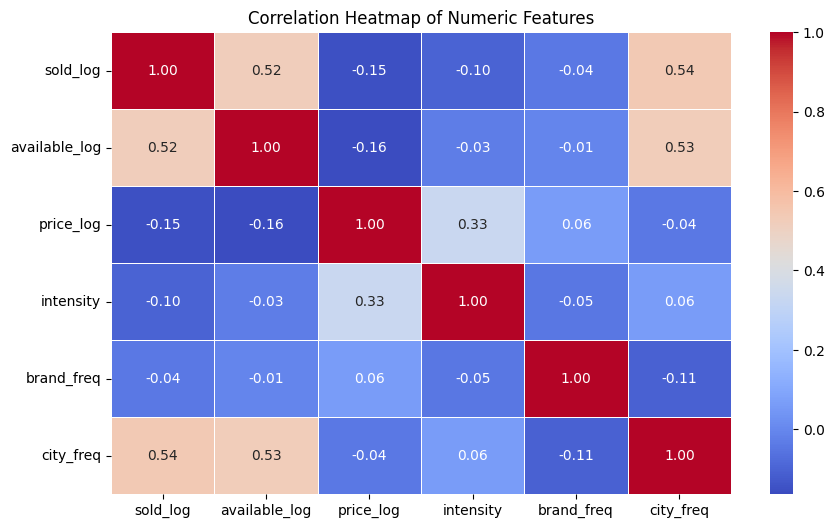

In [36]:
numeric_cols = ['sold_log','available_log','price_log','intensity','brand_freq','city_freq']
data_numeric = df[numeric_cols]
corr = data_numeric.corr()

# Print correlation table
#print("\nCorrelation Matrix:")
#print(corr.round(3))

# Visualize correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("Correlation.jpg", dpi =1000)

Distribution of Price

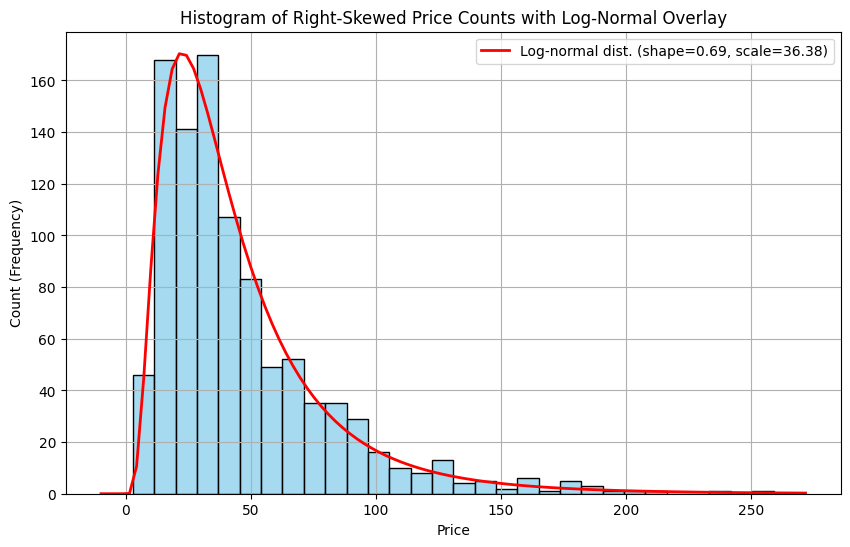

In [37]:
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(df['price'], floc=0)  # Fix loc=0 for positive data

# Plot histogram with counts (frequencies)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Get bin width and total count for scaling the curve
bin_width = plt.gca().patches[0].get_width()  # Approximate bin width
n = len(df['price'])  # Total number of data points

# Overlay the scaled log-normal distribution curve
xmin, xmax = plt.xlim()  # Get x-range from histogram
x = np.linspace(xmin, xmax, 100)  # Generate points for the curve
p = lognorm.pdf(x, shape, loc, scale) * n * bin_width  # Scale PDF to match count scale
plt.plot(x, p, 'r', linewidth=2, label=f'Log-normal dist. (shape={shape:.2f}, scale={scale:.2f})')

# Add labels and title
plt.title('Histogram of Right-Skewed Price Counts with Log-Normal Overlay')
plt.xlabel('Price')
plt.ylabel('Count (Frequency)')
plt.legend()
plt.grid(True)
plt.show()

Distribution of Intensity

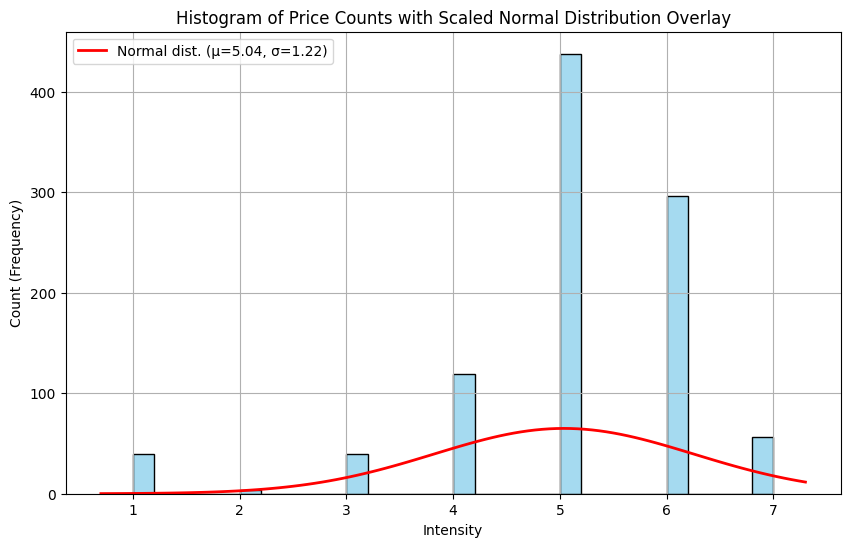

In [198]:
from scipy.stats import norm

mu, std = df['intensity'].mean(), df['intensity'].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['intensity'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Get bin width and total count for scaling the normal curve
bins = plt.gca().patches[0].get_width()  # Approximate bin width from first bar
n = len(df['intensity'])  # Total number of data points

# Overlay the scaled normal distribution curve
xmin, xmax = plt.xlim()  # Get x-range from histogram
x = np.linspace(xmin, xmax, 100)  # Generate points for the curve
p = norm.pdf(x, mu, std) * n * bins  # Scale PDF to match count scale
plt.plot(x, p, 'r', linewidth=2, label=f'Normal dist. (μ={mu:.2f}, σ={std:.2f})')

# Add labels and title
plt.title('Histogram of Price Counts with Scaled Normal Distribution Overlay')
plt.xlabel('Intensity')
plt.ylabel('Count (Frequency)')
plt.legend()
plt.grid(True)
plt.show()

Scenario 1: UnSupervised Learning - Using Standard Scaler
Features: Price, Sold, Available, Brand, Type

In [38]:
num_features = ['price','available','sold']
cat_features = ['brand','type']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

#PCA

X = preprocessor.fit_transform(df)
X_dense = X.toarray() if hasattr(X, "toarray") else X  # convert sparse → dense

pca = PCA(n_components=0.95, random_state=42)  # keep 95% of variance
X_pca = pca.fit_transform(X_dense)
print(f"PCA reduced dimensions from {X_dense.shape[1]} to {X_pca.shape[1]}")
best_k, best_sil = None, -1

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

PCA reduced dimensions from 121 to 50
k=2: Sil=0.111, DBI=2.738
k=3: Sil=0.672, DBI=0.648
k=4: Sil=0.293, DBI=0.990
k=5: Sil=0.201, DBI=1.314
k=6: Sil=0.203, DBI=1.179
k=7: Sil=0.206, DBI=1.184


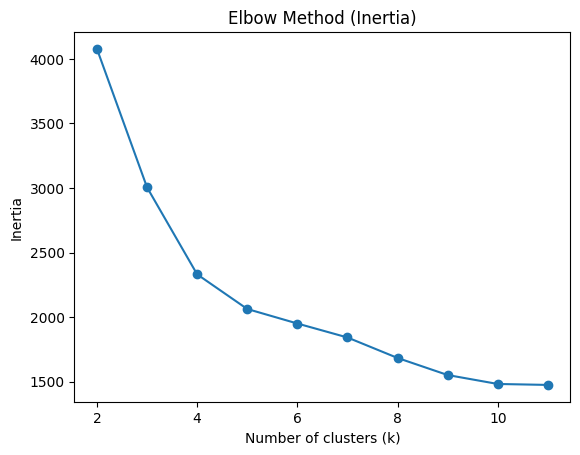

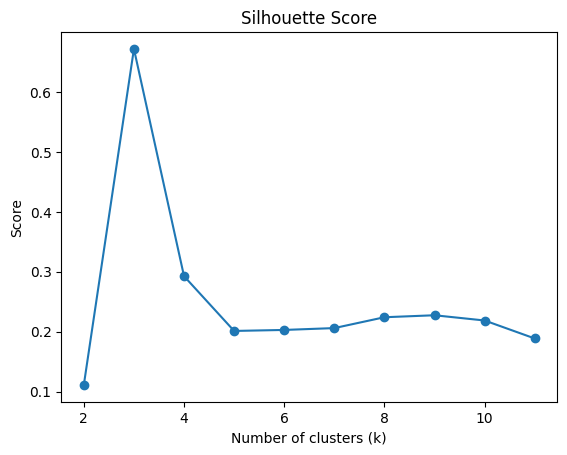

silhouette_score: 0.18870215190039547
davies_bouldin_score: 1.2879342089703796


In [39]:
inertias = []
silhouettes = []
for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca, km.labels_))

plt.plot(range(2, 12), inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
#plt.savefig("elbow.jpg", dpi =1000)
plt.show()
plt.plot(range(2, 12), silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

km_sil = silhouette_score(X_pca, km.labels_)
km_dbi = davies_bouldin_score(X_pca, km.labels_)
print("silhouette_score:",km_sil)
print("davies_bouldin_score:",km_dbi)

In [40]:
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(X_pca)
db_sil =silhouette_score(X_pca, labels)
db_dbi =davies_bouldin_score(X_pca, labels)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)
df['cluster_km'] = km.fit_predict(X_pca)
print(df['cluster_km'].value_counts())
print(df.groupby('cluster_km')[num_features].mean())

silhouette_score: 0.6717287366580704
davies_bouldin_score: 0.648489677077727
cluster_km
0    968
1     17
2      8
Name: count, dtype: int64
                price   available          sold
cluster_km                                     
0           46.661694   12.830579    484.009298
1           24.784706  391.000000   2902.588235
2           30.906250   23.500000  30086.750000


DBSCAN

In [41]:
for eps in [ 0.7, 1.0,1.5,2]:
    for min_samples in [ 5, 10,15]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca)
        # Skip if DBSCAN found only 1 cluster or all noise
        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_pca, labels)
        dbi = davies_bouldin_score(X_pca, labels)
        print(f"eps={eps}, min_samples={min_samples} → Sil={sil:.3f}, DBI={dbi:.3f}")
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(n_clusters)

eps=0.7, min_samples=5 → Sil=0.178, DBI=1.746
42
eps=0.7, min_samples=10 → Sil=0.059, DBI=1.771
19
eps=0.7, min_samples=15 → Sil=-0.050, DBI=1.893
10
eps=1.0, min_samples=5 → Sil=-0.036, DBI=2.037
8
eps=1.0, min_samples=10 → Sil=-0.057, DBI=2.403
4
eps=1.0, min_samples=15 → Sil=0.054, DBI=2.513
3
eps=1.5, min_samples=5 → Sil=0.534, DBI=2.018
2
eps=1.5, min_samples=10 → Sil=0.623, DBI=1.627
1
eps=1.5, min_samples=15 → Sil=0.590, DBI=1.862
1
eps=2, min_samples=5 → Sil=0.759, DBI=1.175
1
eps=2, min_samples=10 → Sil=0.742, DBI=1.213
1
eps=2, min_samples=15 → Sil=0.715, DBI=1.214
1


DBSCAN eps =2, n_samples = 5

In [42]:
db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(X_pca)
db_sil =silhouette_score(X_pca, db.labels_)
db_dbi =davies_bouldin_score(X_pca, db.labels_)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)

df['cluster_db'] = db.fit_predict(X_pca)
print(df['cluster_db'].value_counts())
print(df.groupby('cluster_db')[num_features].mean())

silhouette_score: 0.7585479035392688
davies_bouldin_score: 1.1751052825958845
cluster_db
 0    979
-1     14
Name: count, dtype: int64
                price   available          sold
cluster_db                                     
-1          30.452857  273.500000  18535.071429
 0          46.384852   15.756895    509.773238


Hierarchical

In [43]:
for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = model.fit_predict(X_pca)  ### label applying model
    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)
    print(f"{linkage}: Sil={sil:.3f}, DBI={dbi:.3f}")

ward: Sil=0.233, DBI=1.464
complete: Sil=0.752, DBI=0.483
average: Sil=0.815, DBI=0.174


Hierarchical Linkage average

cluster_agg
0    990
2      2
1      1
Name: count, dtype: int64
                 price   available          sold
cluster_agg                                     
0            46.211283   17.816162    705.173737
1            23.890000   19.000000  54052.000000
2            32.025000  799.000000   3192.500000


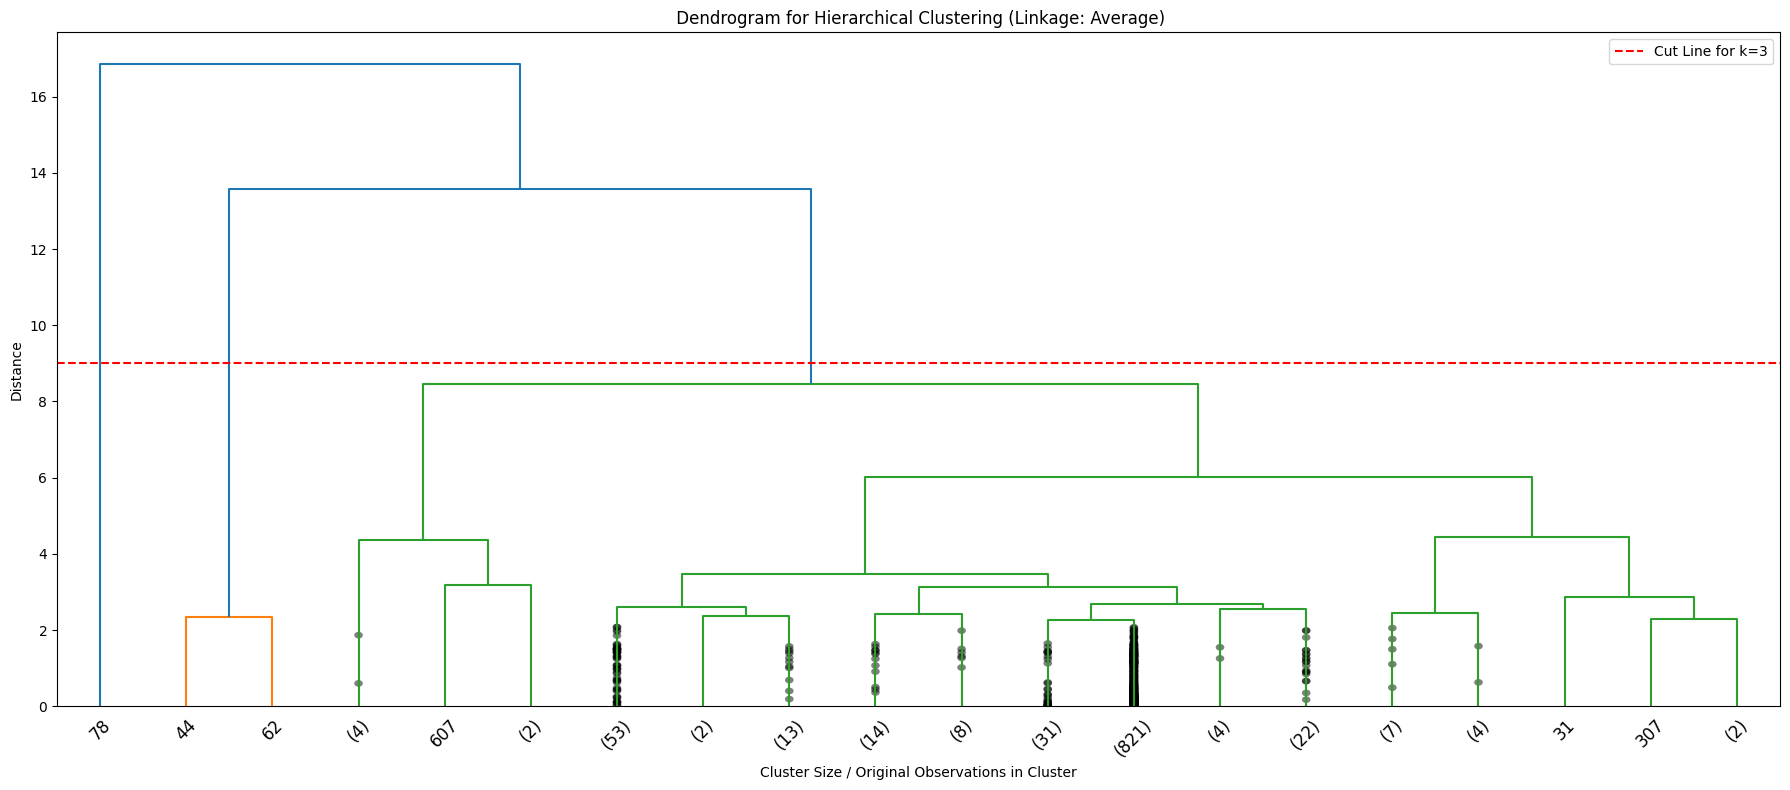

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram # Re-import locally to ensure function is used

agg = AgglomerativeClustering(n_clusters=3, linkage='average')
df['cluster_agg'] = agg.fit_predict(X_pca)
print(df['cluster_agg'].value_counts())
print(df.groupby('cluster_agg')[num_features].mean())

# Plotting improved dendrogram
plt.figure(figsize=(18, 8)) # Increased figure size for better visibility
dendro = dendrogram(linkage(X_pca, method='average'),
                    truncate_mode='lastp', # show only the last p merged clusters
                    p=20,                 # show only the last 10 merges
                    show_leaf_counts=True, # show the number of original observations in the leaf
                    leaf_rotation=45.,    # rotate the leaf labels for readability
                    leaf_font_size=12.,   # font size for the leaf labels
                    show_contracted=True  # to display it clearly when truncate_mode is used
                   )
plt.axhline(y=9, color='r', linestyle='--', label='Cut Line for k=3') # Add cut line for k=3
plt.title(' Dendrogram for Hierarchical Clustering (Linkage: Average)')
plt.xlabel('Cluster Size / Original Observations in Cluster')
plt.ylabel('Distance')
plt.legend() # Show legend for the cut line
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

PCA plot

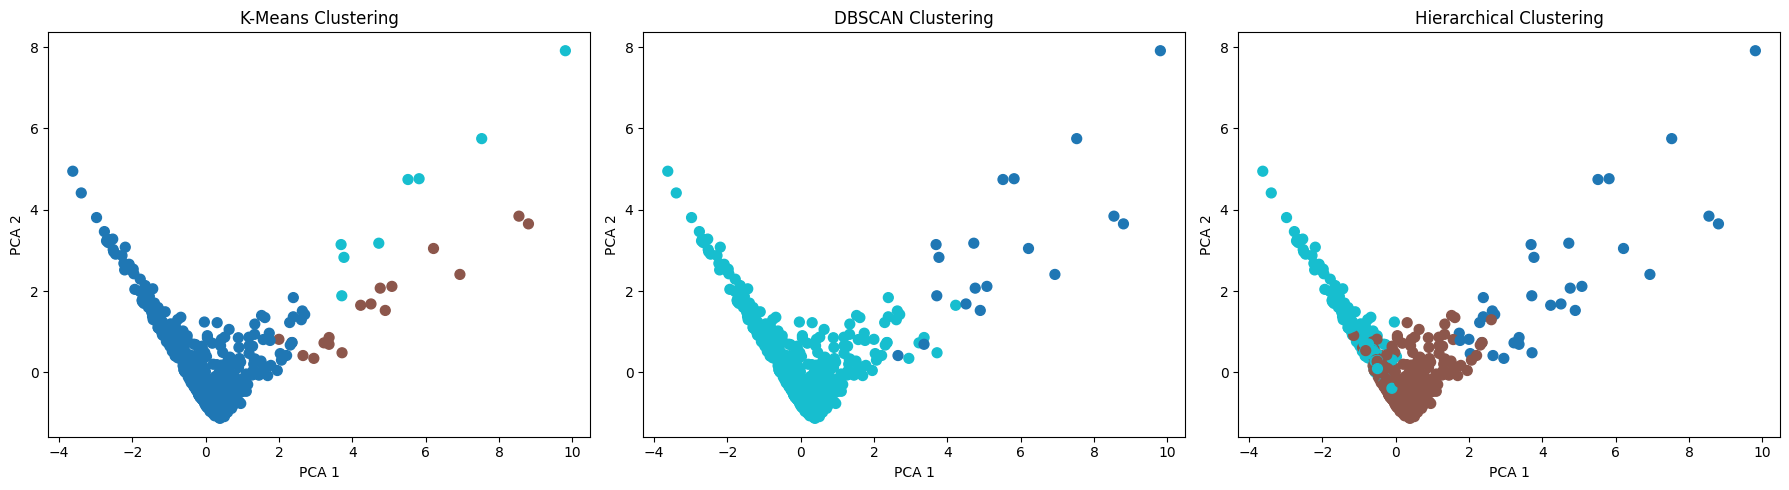

In [45]:
pca_plot = PCA(n_components=2, random_state=42)
X_pca = pca_plot.fit_transform(X_dense)

# --- Apply Clustering Algorithms ---
kmeans = KMeans(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=2.0, min_samples=5)
hierarchical = AgglomerativeClustering(n_clusters=3)

labels_kmeans = kmeans.fit_predict(X_dense)
labels_dbscan = dbscan.fit_predict(X_dense)
labels_hierarchical = hierarchical.fit_predict(X_dense)

# --- Plot Results ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=50)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# DBSCAN
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='tab10', s=50)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

# Hierarchical
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical, cmap='tab10', s=50)
axes[2].set_title("Hierarchical Clustering")
axes[2].set_xlabel("PCA 1")
axes[2].set_ylabel("PCA 2")

plt.tight_layout()

Scenario 2: UnSupervised Learning - Using Robust Scaler
Features: Price, Sold, Available, Brand, Type

PCA reduced dimensions from 121 to 2
k=2: Sil=0.915, DBI=0.486
k=3: Sil=0.924, DBI=0.551
k=4: Sil=0.848, DBI=0.714
k=5: Sil=0.857, DBI=0.612
k=6: Sil=0.828, DBI=0.584
k=7: Sil=0.829, DBI=0.572


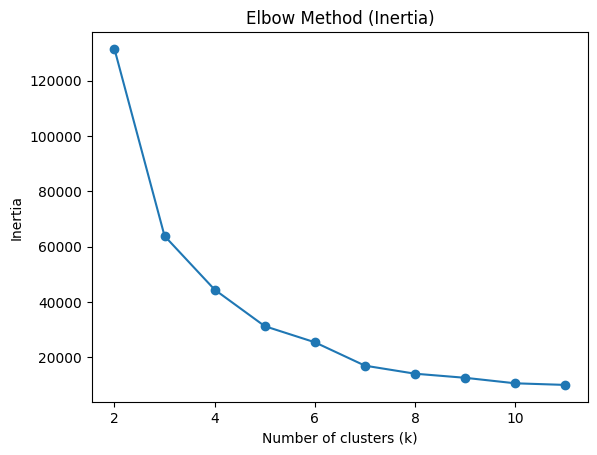

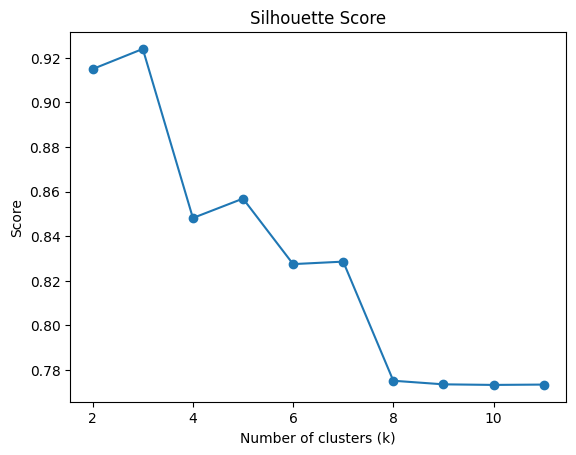

silhouette_score: 0.7735044348005327
davies_bouldin_score: 0.5227678695491987
silhouette_score: 0.9240120833705031
davies_bouldin_score: 0.5509363982527656
cluster_km_robust
0    968
1     13
2     12
Name: count, dtype: int64
                       price   available          sold
cluster_km_robust                                     
0                  46.629690   13.855372    428.730372
1                  30.253846   21.615385  23431.846154
2                  25.522500  463.500000   3244.500000
eps=0.7, min_samples=5 → Sil=0.647, DBI=1.343
2
eps=0.7, min_samples=10 → Sil=0.538, DBI=1.357
2
eps=0.7, min_samples=15 → Sil=0.706, DBI=1.261
1
eps=1.0, min_samples=5 → Sil=0.655, DBI=1.323
2
eps=1.0, min_samples=10 → Sil=0.649, DBI=1.349
2
eps=1.0, min_samples=15 → Sil=0.731, DBI=1.230
1
eps=1.5, min_samples=5 → Sil=0.750, DBI=1.559
2
eps=1.5, min_samples=10 → Sil=0.809, DBI=1.141
1
eps=1.5, min_samples=15 → Sil=0.656, DBI=1.330
2
eps=2, min_samples=5 → Sil=0.759, DBI=1.477
3
eps=2, min_sam

In [46]:
num_features = ['price','available','sold']
cat_features = ['brand','type']

preprocessor_robust = ColumnTransformer([
    ('num', RobustScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

#PCA

X_robust = preprocessor_robust.fit_transform(df)
X_dense_robust = X_robust.toarray() if hasattr(X_robust, "toarray") else X_robust  # convert sparse → dense

pca_robust = PCA(n_components=0.95, random_state=42)  # keep 95% of variance
X_pca_robust = pca_robust.fit_transform(X_dense_robust)
print(f"PCA reduced dimensions from {X_dense_robust.shape[1]} to {X_pca_robust.shape[1]}")
best_k, best_sil = None, -1

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca_robust)
    sil = silhouette_score(X_pca_robust, labels)
    dbi = davies_bouldin_score(X_pca_robust, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

inertias = []
silhouettes = []
for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca_robust)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca_robust, km.labels_))

plt.plot(range(2, 12), inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
#plt.savefig("elbow.jpg", dpi =1000)
plt.show()
plt.plot(range(2, 12), silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

km_sil = silhouette_score(X_pca_robust, km.labels_)
km_dbi = davies_bouldin_score(X_pca_robust, km.labels_)
print("silhouette_score:",km_sil)
print("davies_bouldin_score:",km_dbi)

#============================================
# K Means
#============================================
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(X_pca_robust)
db_sil =silhouette_score(X_pca_robust, labels)
db_dbi =davies_bouldin_score(X_pca_robust, labels)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)
df['cluster_km_robust'] = km.fit_predict(X_pca_robust)
print(df['cluster_km_robust'].value_counts())
print(df.groupby('cluster_km_robust')[num_features].mean())

#============================================
# DBSCAN
#============================================
for eps in [ 0.7, 1.0,1.5,2]:
    for min_samples in [ 5, 10,15]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca_robust)
        # Skip if DBSCAN found only 1 cluster or all noise
        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_pca_robust, labels)
        dbi = davies_bouldin_score(X_pca_robust, labels)
        print(f"eps={eps}, min_samples={min_samples} → Sil={sil:.3f}, DBI={dbi:.3f}")
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(n_clusters)

db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(X_pca_robust)
db_sil =silhouette_score(X_pca_robust, db.labels_)
db_dbi =davies_bouldin_score(X_pca_robust, db.labels_)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)

df['cluster_db_robust'] = db.fit_predict(X_pca_robust)
print(df['cluster_db_robust'].value_counts())
print(df.groupby('cluster_db_robust')[num_features].mean())

#============================================
# Hierarchical
#============================================

for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = model.fit_predict(X_pca_robust)  ### label applying model
    sil = silhouette_score(X_pca_robust, labels)
    dbi = davies_bouldin_score(X_pca_robust, labels)
    print(f"{linkage}: Sil={sil:.3f}, DBI={dbi:.3f}")

agg = AgglomerativeClustering(n_clusters=3, linkage='average')
df['cluster_agg_robust'] = agg.fit_predict(X_pca_robust)
print(df['cluster_agg_robust'].value_counts())
print(df.groupby('cluster_agg_robust')[num_features].mean())

Dendrogram


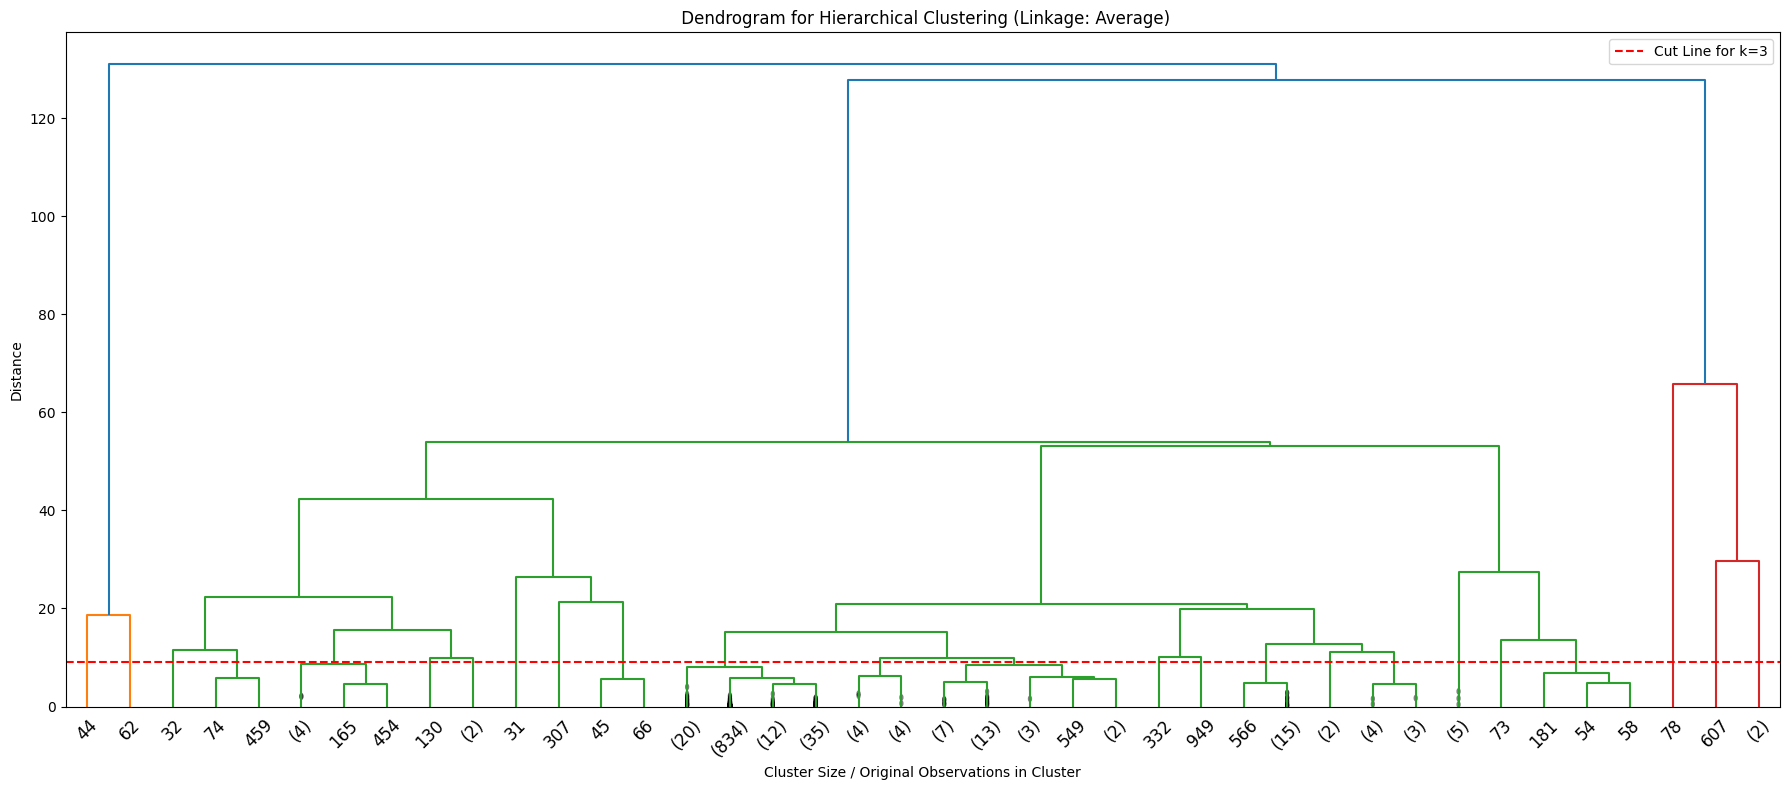

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(18, 8)) # Increased figure size for better visibility
dendro = dendrogram(linkage(X_pca_robust, method='average'),
                    truncate_mode='lastp', # show only the last p merged clusters
                    p=40,                 # show only the last 10 merges
                    show_leaf_counts=True, # show the number of original observations in the leaf
                    leaf_rotation=45.,    # rotate the leaf labels for readability
                    leaf_font_size=12.,   # font size for the leaf labels
                    show_contracted=True  # to display it clearly when truncate_mode is used
                   )
plt.axhline(y=9, color='r', linestyle='--', label='Cut Line for k=3') # Add cut line for k=3
plt.title(' Dendrogram for Hierarchical Clustering (Linkage: Average)')
plt.xlabel('Cluster Size / Original Observations in Cluster')
plt.ylabel('Distance')
plt.legend() # Show legend for the cut line
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

PCA PLOT ROBUST

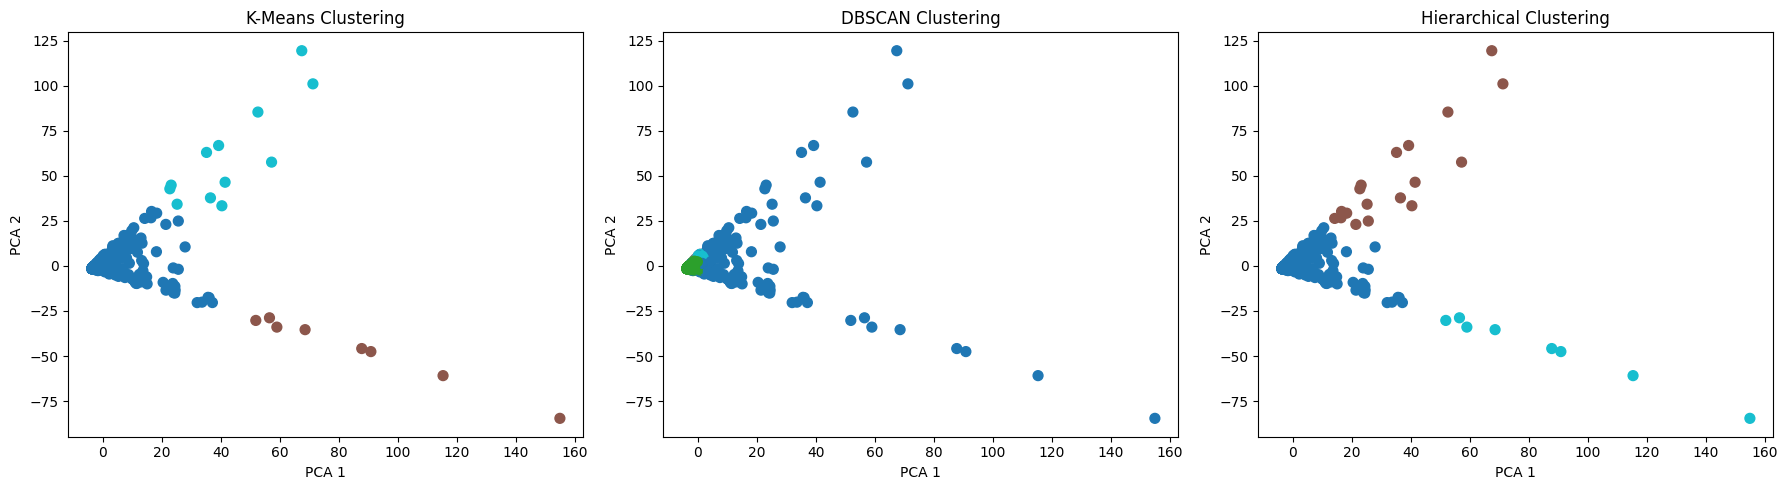

In [48]:
pca_plot_robust = PCA(n_components=2, random_state=42)
X_pca_robust = pca_plot_robust.fit_transform(X_dense_robust)

# --- Apply Clustering Algorithms ---
kmeans = KMeans(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=2.0, min_samples=5)
hierarchical = AgglomerativeClustering(n_clusters=3)

labels_kmeans = kmeans.fit_predict(X_dense_robust)
labels_dbscan = dbscan.fit_predict(X_dense_robust)
labels_hierarchical = hierarchical.fit_predict(X_dense_robust)

# --- Plot Results ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans
axes[0].scatter(X_pca_robust[:, 0], X_pca_robust[:, 1], c=labels_kmeans, cmap='tab10', s=50)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# DBSCAN
axes[1].scatter(X_pca_robust[:, 0], X_pca_robust[:, 1], c=labels_dbscan, cmap='tab10', s=50)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

# Hierarchical
axes[2].scatter(X_pca_robust[:, 0], X_pca_robust[:, 1], c=labels_hierarchical, cmap='tab10', s=50)
axes[2].set_title("Hierarchical Clustering")
axes[2].set_xlabel("PCA 1")
axes[2].set_ylabel("PCA 2")

plt.tight_layout()

Comparision: Scaler vs Robust


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               993 non-null    object 
 1   type                993 non-null    object 
 2   price               993 non-null    float64
 3   available           993 non-null    float64
 4   sold                993 non-null    float64
 5   itemLocation        993 non-null    object 
 6   intensity           993 non-null    int64  
 7   price_log           993 non-null    float64
 8   available_log       993 non-null    float64
 9   sold_log            993 non-null    float64
 10  Country             993 non-null    object 
 11  City                993 non-null    object 
 12  brand_freq          993 non-null    int64  
 13  city_freq           993 non-null    int64  
 14  cluster_km          993 non-null    int32  
 15  cluster_db          993 non-null    int64  
 16  cluster_

Scenario 3: UnSupervised Learning - Using Standard Scaler Features: Price_log, Sold_log, Available_log, Brand_freq, intensity, city_freq



In [82]:
num_data = df[['price_log','available_log','sold_log','intensity','brand_freq','city_freq']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
best_k, best_sil = None, -1

#-------------------------------
# K Means
#-------------------------------
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil = silhouette_score(scaled_data, labels)
    dbi = davies_bouldin_score(scaled_data, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

km = KMeans(n_clusters=2, random_state=42)
df['cluster_SKM'] = km.fit_predict(scaled_data)
print(df['cluster_SKM'].value_counts())
print(df.groupby('cluster_SKM')[num_features].mean())

#-------------------------------
# DBSCAN
#-------------------------------
db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(scaled_data)
db_sil =silhouette_score(scaled_data, db.labels_)
db_dbi =davies_bouldin_score(scaled_data, db.labels_)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)
df['cluster_sdb'] = db.labels_
print(df['cluster_sdb'].value_counts())
print(df.groupby('cluster_sdb')[num_features].mean())


#-------------------------------
# Hierarchical
#-------------------------------
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['cluster_agglo'] = agglo.fit_predict(scaled_data)
print(df['cluster_agglo'].value_counts())
print(df.groupby('cluster_agglo')[num_features].mean())
sil = silhouette_score(scaled_data, agglo.labels_)
dbi = davies_bouldin_score(scaled_data, agglo.labels_)
print("silhouette_score:",sil)
print("davies_bouldin_score:",dbi)

k=2: Sil=0.310, DBI=1.311
k=3: Sil=0.224, DBI=1.643
k=4: Sil=0.237, DBI=1.419
k=5: Sil=0.229, DBI=1.350
k=6: Sil=0.218, DBI=1.423
k=7: Sil=0.192, DBI=1.526
cluster_SKM
1    770
0    223
Name: count, dtype: int64
                 price  available         sold
cluster_SKM                                   
0            40.030673  61.403587  3022.775785
1            47.935416   7.223377   109.714286
silhouette_score: 0.23447458752532208
davies_bouldin_score: 1.3206774320977057
cluster_sdb
 0    991
-1      2
Name: count, dtype: int64
                 price  available       sold
cluster_sdb                                 
-1           11.450000  69.500000  167.50000
 0           46.230283  19.289606  765.10999
cluster_agglo
0    771
1    222
Name: count, dtype: int64
                   price  available         sold
cluster_agglo                                   
0              47.795331   7.359274   148.175097
1              40.481577  61.175676  2902.324324
silhouette_score: 0.302921834

dendrogram

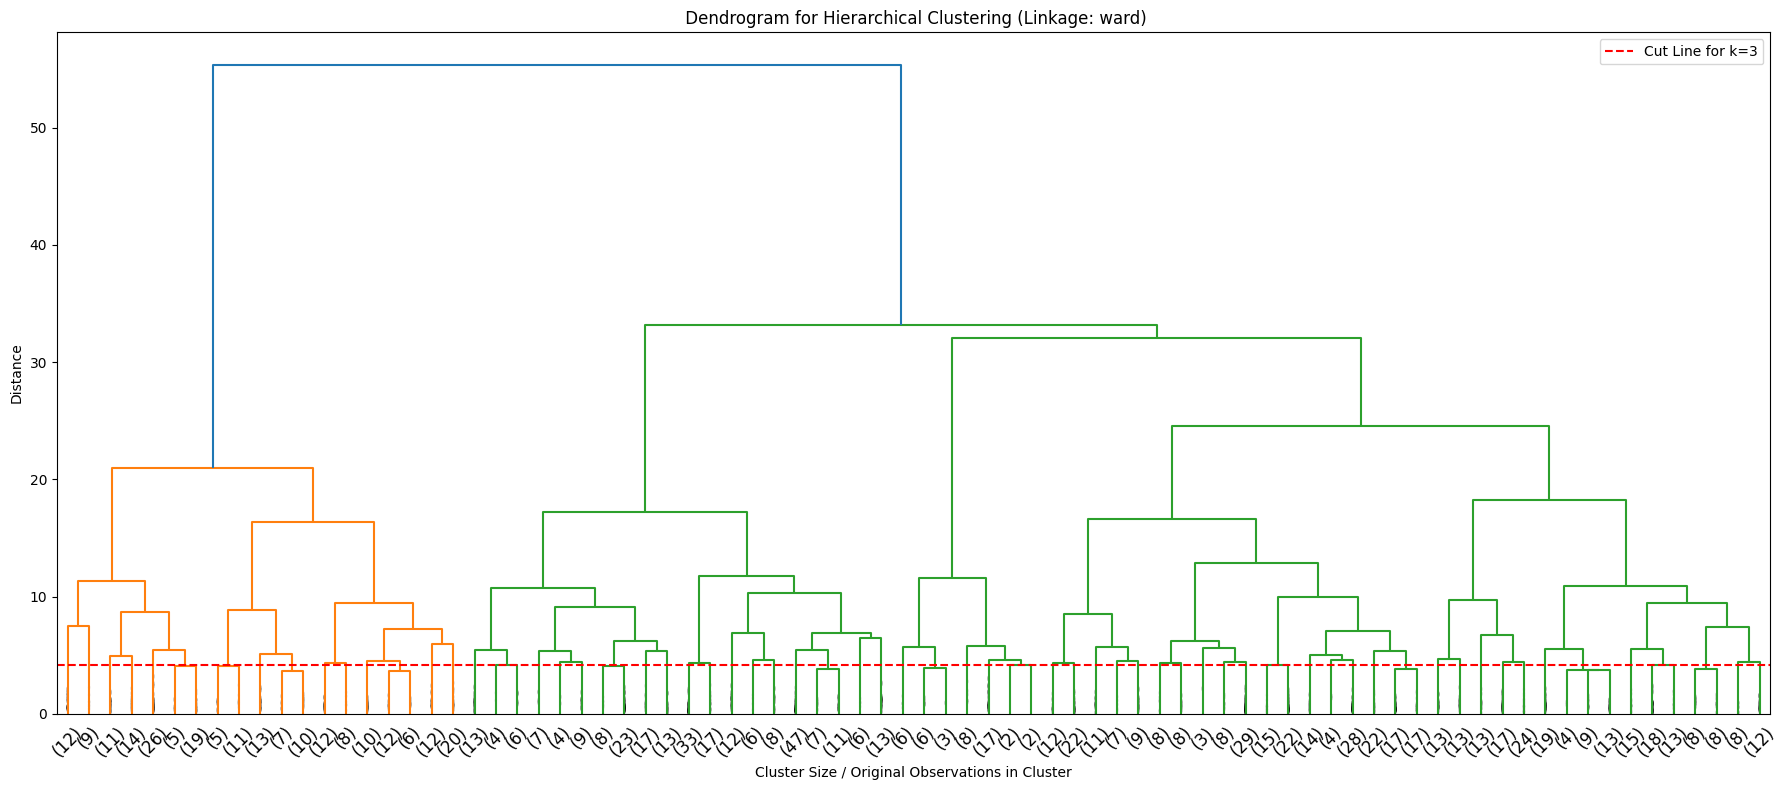

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(18, 8)) # Increased figure size for better visibility
dendro = dendrogram(linkage(scaled_data, method='ward'),
                    truncate_mode='lastp', # show only the last p merged clusters
                    p=80,                 # show only the last 10 merges
                    show_leaf_counts=True, # show the number of original observations in the leaf
                    leaf_rotation=45.,    # rotate the leaf labels for readability
                    leaf_font_size=12.,   # font size for the leaf labels
                    show_contracted=True  # to display it clearly when truncate_mode is used
                   )
plt.axhline(y=4.2, color='r', linestyle='--', label='Cut Line for k=3') # Add cut line for k=3
plt.title(' Dendrogram for Hierarchical Clustering (Linkage: ward)')
plt.xlabel('Cluster Size / Original Observations in Cluster')
plt.ylabel('Distance')
plt.legend() # Show legend for the cut line
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

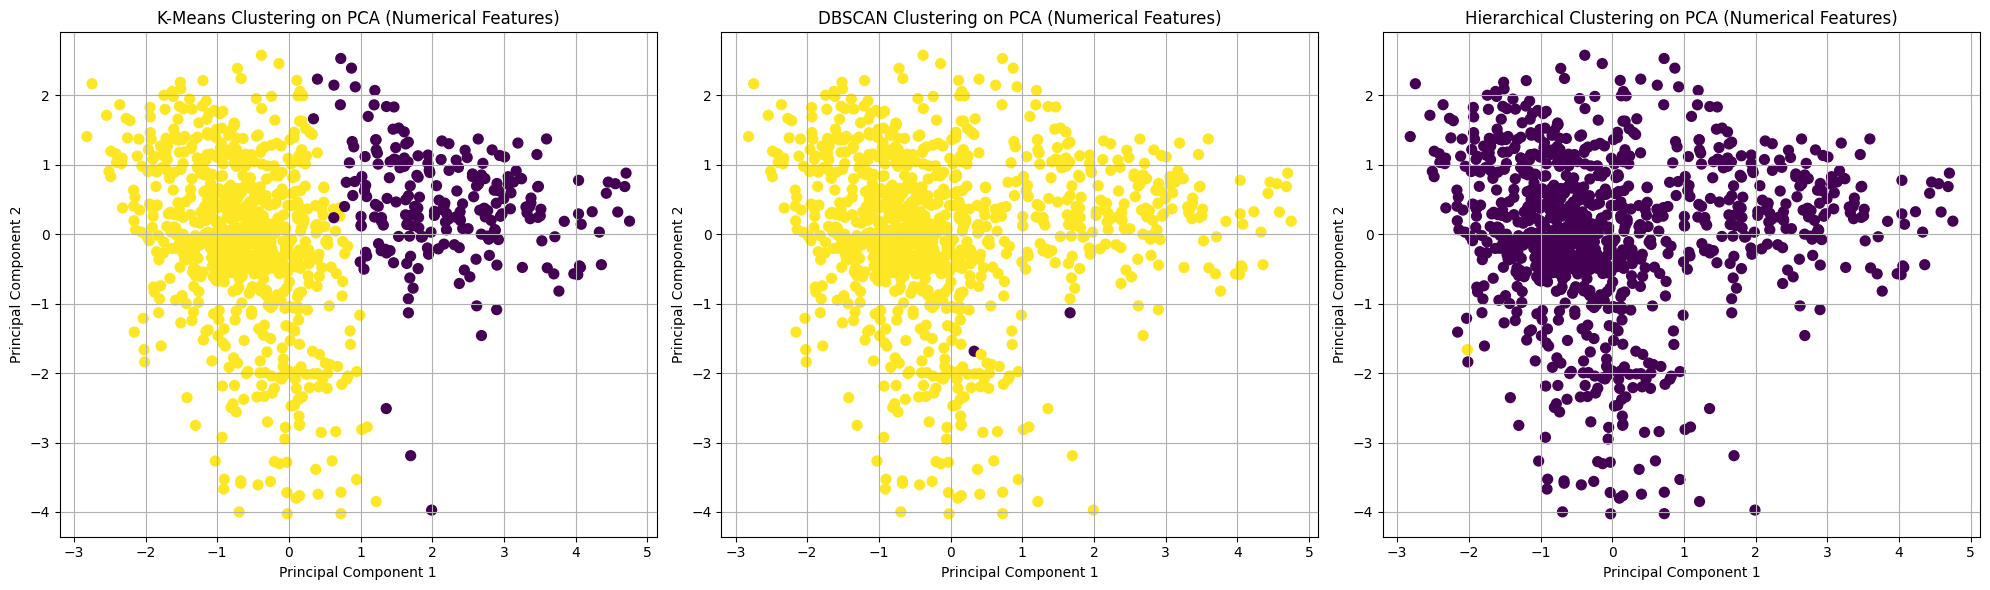

In [52]:
pca_plot_num = PCA(n_components=2, random_state=42)
X_pca_num = pca_plot_num.fit_transform(scaled_data)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means Plot
axes[0].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df['cluster_SKM'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering on PCA (Numerical Features)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# DBSCAN Plot
# For DBSCAN, cluster -1 represents noise points, which can be plotted in a distinct color
dbscan_labels = df['cluster_sdb']
axes[1].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering on PCA (Numerical Features)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Hierarchical Clustering Plot
axes[2].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df['cluster_agglo'], cmap='viridis', s=50)
axes[2].set_title('Hierarchical Clustering on PCA (Numerical Features)')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')
axes[2].grid(True)

plt.tight_layout()
plt.show()

PCA plot

Scenario 4: UnSupervised Learning - Using Robust Scaler Features: Price_log, Sold_log, Available_log, Brand_freq, intensity, city_freq

k=2: Sil=0.312, DBI=1.601
k=3: Sil=0.364, DBI=1.010
k=4: Sil=0.211, DBI=1.531
k=5: Sil=0.210, DBI=1.437
k=6: Sil=0.207, DBI=1.390
k=7: Sil=0.211, DBI=1.347
k=2: Sil=0.312, DBI=1.601
k=3: Sil=0.364, DBI=1.010
k=4: Sil=0.211, DBI=1.531
k=5: Sil=0.210, DBI=1.437
k=6: Sil=0.207, DBI=1.390
k=7: Sil=0.211, DBI=1.347
cluster_RKM
2    748
0    149
1     96
Name: count, dtype: int64
                 price  available         sold
cluster_RKM                                   
0            34.753893  88.986577  3682.281879
1            21.751458   8.250000   413.895833
2            51.565027   6.957219   227.493316
silhouette_score: 0.2759579873474115
davies_bouldin_score: 0.5804038112770393
cluster_rdb
 0    992
-1      1
Name: count, dtype: int64
                price  available        sold
cluster_rdb                                 
-1            3.00000  39.000000    4.000000
 0           46.20374  19.370968  764.672379
cluster_ragglo
0    781
1    122
2     90
Name: count, dtype: int64
    

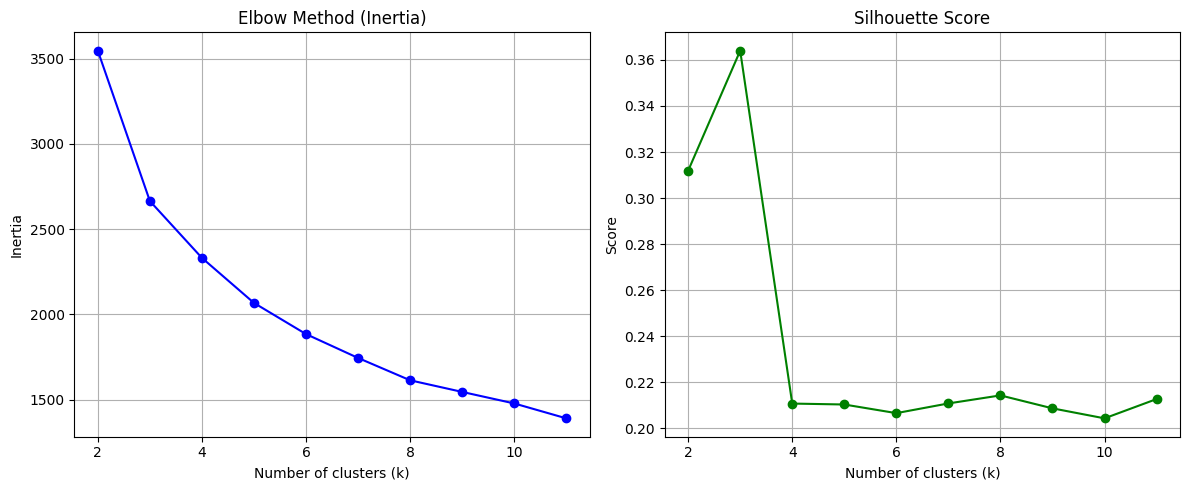

In [77]:
num_data = df[['price_log','available_log','sold_log','intensity','brand_freq','city_freq']]
scaler2 = RobustScaler()
scaled_data2 = scaler2.fit_transform(num_data)
best_k, best_sil = None, -1

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data2)
    sil = silhouette_score(scaled_data2, labels)
    dbi = davies_bouldin_score(scaled_data2, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

inertias = []
silhouettes = []
for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42).fit(scaled_data2)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(scaled_data2, km.labels_))


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Elbow Method (Inertia)
axs[0].plot(range(2, 12), inertias, marker='o', color='b')
axs[0].set_title("Elbow Method (Inertia)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("Inertia")
axs[0].grid(True)

# Second subplot: Silhouette Score
axs[1].plot(range(2, 12), silhouettes, marker='o', color='g')
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Score")
axs[1].grid(True)


plt.tight_layout()


plt.savefig("clustering_metrics.jpg", dpi=1000)

#-------------------------------
# K Means
#-------------------------------
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data2)
    sil = silhouette_score(scaled_data2, labels)
    dbi = davies_bouldin_score(scaled_data2, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

km = KMeans(n_clusters=3, random_state=42)
df['cluster_RKM'] = km.fit_predict(scaled_data2)
print(df['cluster_RKM'].value_counts())
print(df.groupby('cluster_RKM')[num_features].mean())

#-------------------------------
# DBSCAN
#-------------------------------
db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(scaled_data2)
db_sil =silhouette_score(scaled_data2, db.labels_)
db_dbi =davies_bouldin_score(scaled_data2, db.labels_)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)
df['cluster_rdb'] = db.labels_
print(df['cluster_rdb'].value_counts())
print(df.groupby('cluster_rdb')[num_features].mean())


#-------------------------------
# Hierarchical
#-------------------------------
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['cluster_ragglo'] = agglo.fit_predict(scaled_data2)
print(df['cluster_ragglo'].value_counts())
print(df.groupby('cluster_ragglo')[num_features].mean())
sil = silhouette_score(scaled_data2, agglo.labels_)
dbi = davies_bouldin_score(scaled_data2, agglo.labels_)
print("silhouette_score:",sil)
print("davies_bouldin_score:",dbi)

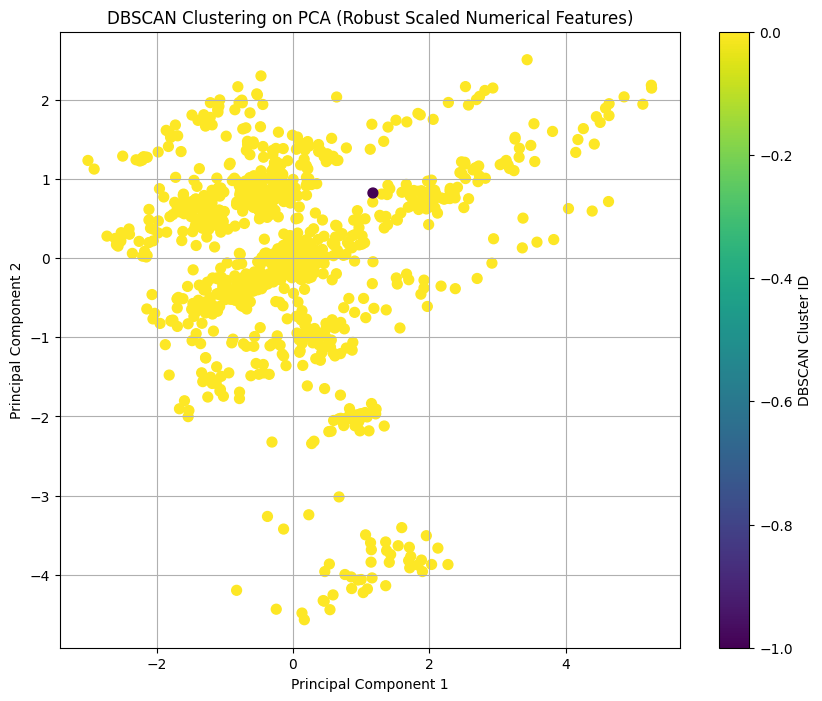

In [78]:
pca_plot_num = PCA(n_components=2, random_state=42)
X_pca_num = pca_plot_num.fit_transform(scaled_data2)

plt.figure(figsize=(10, 8))
dbscan_labels = df['cluster_rdb']
plt.scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on PCA (Robust Scaled Numerical Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='DBSCAN Cluster ID')
plt.show()

Dendrogram

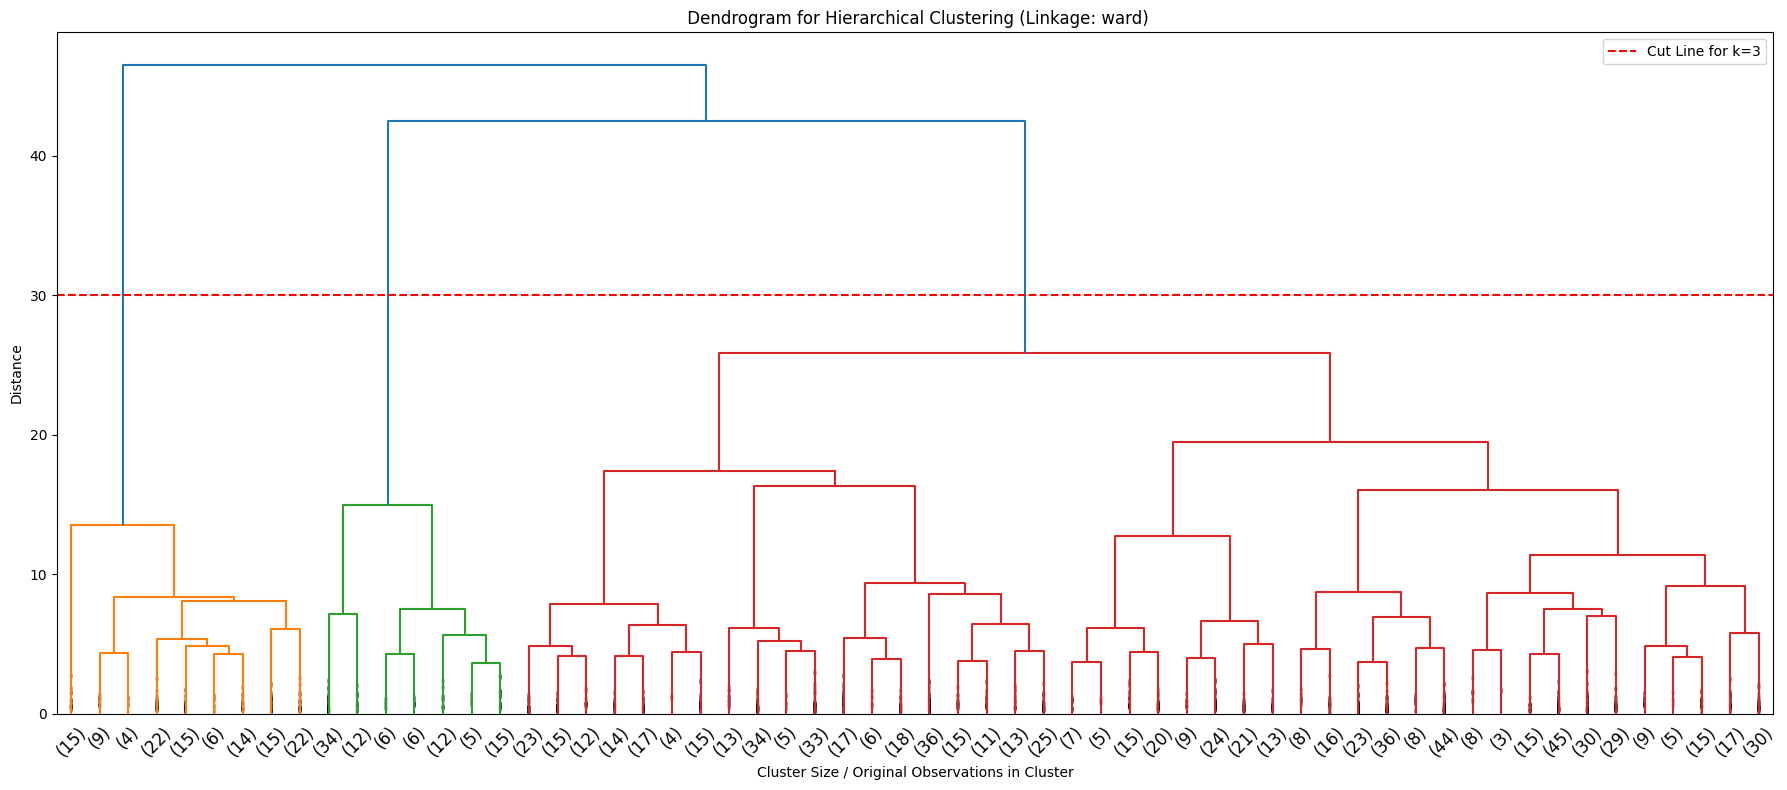

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(18, 8)) # Increased figure size for better visibility
dendro = dendrogram(linkage(scaled_data2, method='ward'),
                    truncate_mode='lastp', # show only the last p merged clusters
                    p=60,                 # show only the last 60 merges
                    show_leaf_counts=True, # show the number of original observations in the leaf
                    leaf_rotation=45.,    # rotate the leaf labels for readability
                    leaf_font_size=12.,   # font size for the leaf labels
                    show_contracted=True  # to display it clearly when truncate_mode is used
                   )
plt.axhline(y=30, color='r', linestyle='--', label='Cut Line for k=3') # Add cut line for k=3
plt.title(' Dendrogram for Hierarchical Clustering (Linkage: ward)')
plt.xlabel('Cluster Size / Original Observations in Cluster')
plt.ylabel('Distance')
plt.legend() # Show legend for the cut line
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('dendrogram.jpg',dpi =1000)

PCA Plot

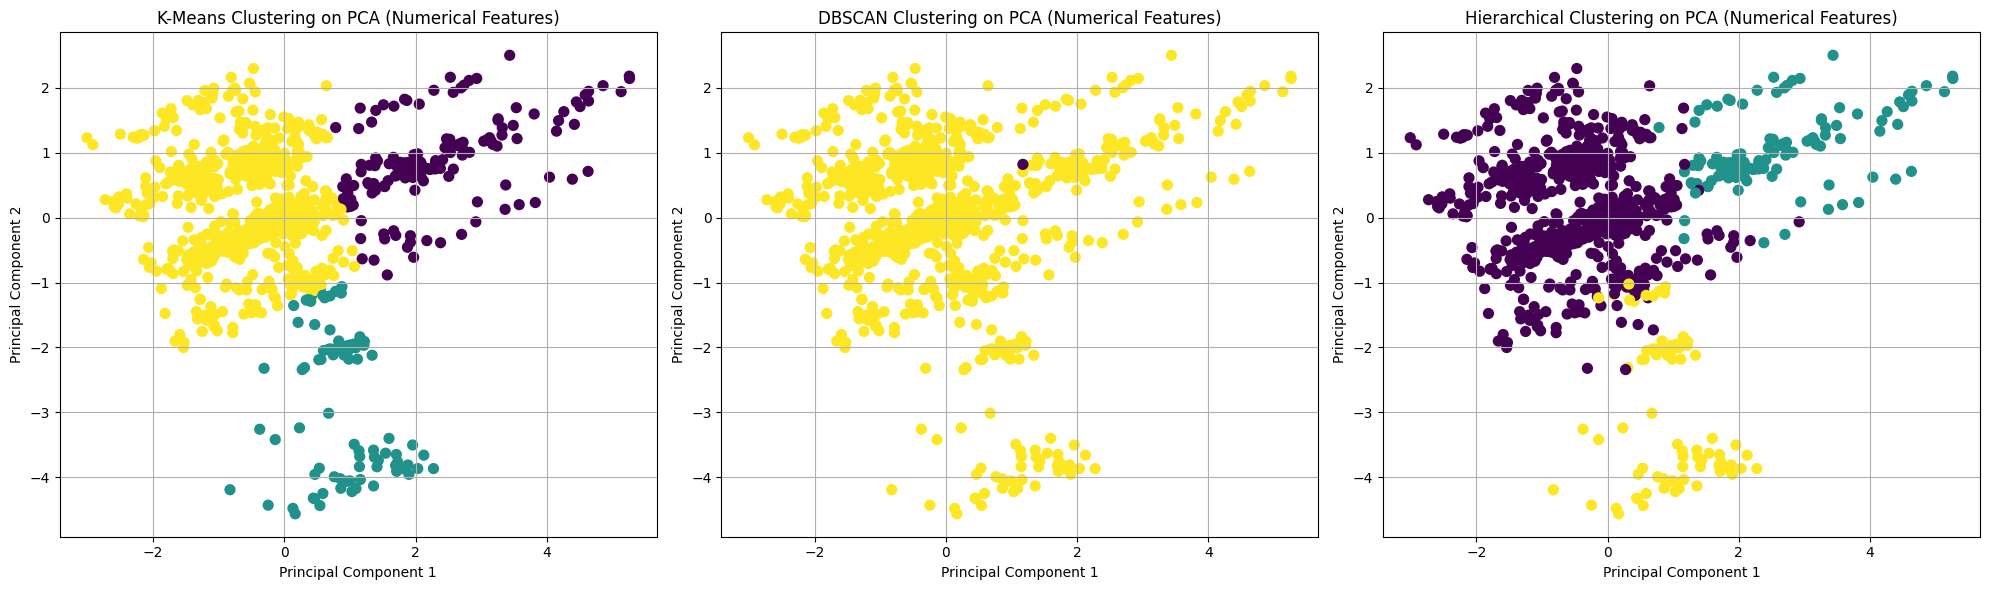

In [83]:
pca_plot_num = PCA(n_components=2, random_state=42)
X_pca_num = pca_plot_num.fit_transform(scaled_data2)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means Plot
axes[0].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df['cluster_RKM'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering on PCA (Numerical Features)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# DBSCAN Plot
# For DBSCAN, cluster -1 represents noise points, which can be plotted in a distinct color
dbscan_labels = df['cluster_rdb']
axes[1].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering on PCA (Numerical Features)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Hierarchical Clustering Plot
axes[2].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df['cluster_ragglo'], cmap='viridis', s=50)
axes[2].set_title('Hierarchical Clustering on PCA (Numerical Features)')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('pca_robust.jpg', dpi = 1000)

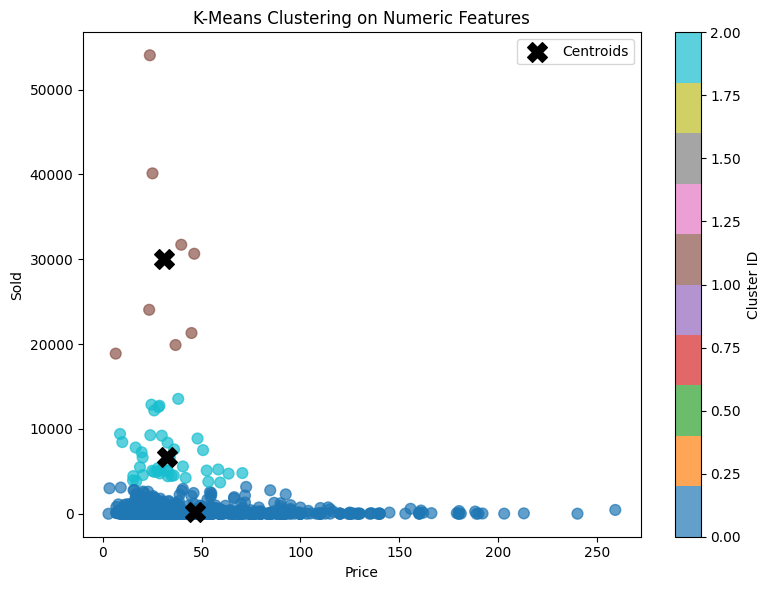

In [66]:
# --- Select only numeric features ---
X_num = df[['price', 'sold']].copy()
X_num.head()
# --- Scale numeric data ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_num)

# --- Fit KMeans (you can adjust n_clusters) ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- Add cluster labels back to df ---
df['cluster_kmeans'] = labels

# --- Get cluster centers (unscale for readability) ---
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

# --- Plot ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['price'], df['sold'], c=df['cluster_kmeans'], cmap='tab10', s=60, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.title('K-Means Clustering on Numeric Features')
plt.legend()
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.savefig('kmeans_robust.jpg', dpi =1000)

Scenario 5: Unsupervised learning before data preprocessing

In [56]:
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              996 non-null    float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [57]:
df_unclean.dropna(inplace=True)
df_unclean.reset_index(drop=True, inplace=True)
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              839 non-null    object 
 1   title              839 non-null    object 
 2   type               839 non-null    object 
 3   price              839 non-null    float64
 4   priceWithCurrency  839 non-null    object 
 5   available          839 non-null    float64
 6   availableText      839 non-null    object 
 7   sold               839 non-null    float64
 8   lastUpdated        839 non-null    object 
 9   itemLocation       839 non-null    object 
dtypes: float64(3), object(7)
memory usage: 65.7+ KB


In [84]:

num_cols =['price','available','sold']
cat_cols = ['brand','type','itemLocation']

dfs=df_unclean[['price','available','sold','brand','type','itemLocation']]
# =====================================================
# ONE-HOT + SCALING USING ColumnTransformer
# =====================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

#ohe = OneHotEncoder(sparse_output=False, drop='first')
#X_cat = ohe.fit_transform(df[cat_cols])
#X_num = df[num_cols].values
#scaler = StandardScaler()
#X_num_scaled = scaler.fit_transform(X_num)
#X_enc = np.hstack([X_num_scaled, X_cat])





X_enc = preprocess.fit_transform(df_unclean)

# Convert sparse to dense for PCA
X_dense = X_enc.toarray() if hasattr(X_enc, "toarray") else X_enc


pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_dense)

# =====================================================
# KMEANS
# =====================================================
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

sil_kmeans = silhouette_score(X_pca, kmeans_labels)
dbi_kmeans = davies_bouldin_score(X_pca, kmeans_labels)

# =====================================================
# DBSCAN – choose eps using 90th percentile k-distance
# =====================================================
min_samples = 6

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_pca)
distances, idx = nbrs.kneighbors(X_pca)
dist_sorted = np.sort(distances[:, -1])

eps = np.percentile(dist_sorted, 90)   # automatic eps selection

db = DBSCAN(eps=2, min_samples=5)
db_labels = db.fit_predict(X_pca)

# Valid silhouette only if DBSCAN finds >=2 clusters
if len(set(db_labels)) - (1 if -1 in db_labels else 0) >= 2:
    mask = db_labels != -1
    sil_db = silhouette_score(X_pca[mask], db_labels[mask])
    dbi_db = davies_bouldin_score(X_pca[mask], db_labels[mask])
    print(f"DBSCAN (PCA10, eps={eps:.3f}):  {sil_db},{dbi_db:.4f}")
else:
    sil_db = 'nan'
    dbi_db = 'nan'
    print(f"DBSCAN (PCA10, eps={eps}):  {sil_db},{dbi_db}")

# =====================================================
# HIERARCHICAL CLUSTERING
# =====================================================
agg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
agg_labels = agg.fit_predict(X_pca)

sil_agg = silhouette_score(X_pca, agg_labels)
dbi_agg = davies_bouldin_score(X_pca, agg_labels)

# =====================================================
# PRINT RESULTS
# =====================================================
print("===== SILHOUETTE SCORES (City Included with OneHotEncoder) =====")
print(f"KMeans (PCA10):                 {sil_kmeans:.4f},{dbi_kmeans:.4f}")
print(f"Agglomerative (PCA10):          {sil_agg:.4f},{dbi_agg:.4f}")

# Show cluster size summary
def summary(name, labels):
    uniq, counts = np.unique(labels, return_counts=True)
    print(f"\n{name} cluster counts:")
    for u, c in zip(uniq, counts):
        print(f"  Cluster {u}: {c}")

summary("KMeans", kmeans_labels)
summary("Agglomerative", agg_labels)
summary("DBSCAN", db_labels)


DBSCAN (PCA10, eps=1.9745156126992578):  nan,nan
===== SILHOUETTE SCORES (City Included with OneHotEncoder) =====
KMeans (PCA10):                 0.2161,1.5086
Agglomerative (PCA10):          0.6834,0.5155

KMeans cluster counts:
  Cluster 0: 168
  Cluster 1: 643
  Cluster 2: 28

Agglomerative cluster counts:
  Cluster 0: 828
  Cluster 1: 2
  Cluster 2: 9

DBSCAN cluster counts:
  Cluster -1: 44
  Cluster 0: 795


In [85]:
best_k, best_sil = None, -1

for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

k=2: Sil=0.586, DBI=1.214
k=3: Sil=0.543, DBI=0.895
k=4: Sil=0.229, DBI=1.282
k=5: Sil=0.131, DBI=1.745
k=6: Sil=0.061, DBI=1.991
k=7: Sil=0.068, DBI=2.016
k=8: Sil=0.136, DBI=1.842
k=9: Sil=0.111, DBI=1.956
k=10: Sil=0.088, DBI=2.268
k=11: Sil=0.088, DBI=2.148


In [60]:
for eps in [ 0.7, 1.0,1.5,2]:
    for min_samples in [ 5, 10,15]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca)
        # Skip if DBSCAN found only 1 cluster or all noise
        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_pca, labels)
        dbi = davies_bouldin_score(X_pca, labels)
        print(f"eps={eps}, min_samples={min_samples} → Sil={sil:.3f}, DBI={dbi:.3f}")

eps=0.7, min_samples=5 → Sil=-0.232, DBI=1.518
eps=1.0, min_samples=5 → Sil=-0.177, DBI=1.708
eps=1.0, min_samples=10 → Sil=-0.180, DBI=1.956
eps=1.5, min_samples=5 → Sil=-0.039, DBI=3.582
eps=1.5, min_samples=10 → Sil=-0.043, DBI=4.680
eps=1.5, min_samples=15 → Sil=-0.030, DBI=3.292
eps=2, min_samples=5 → Sil=0.511, DBI=2.194
eps=2, min_samples=10 → Sil=0.485, DBI=2.297
eps=2, min_samples=15 → Sil=0.466, DBI=2.469


In [61]:
for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = model.fit_predict(X_pca)  ### label applying model
    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)
    print(f"{linkage}: Sil={sil:.3f}, DBI={dbi:.3f}")



ward: Sil=0.183, DBI=1.603
complete: Sil=0.633, DBI=0.684
average: Sil=0.683, DBI=0.516


PCA reduced dimensions from 526 to 2
k=2: Sil=0.922, DBI=0.481
k=3: Sil=0.862, DBI=0.796
k=4: Sil=0.889, DBI=0.572
k=5: Sil=0.838, DBI=0.583
k=6: Sil=0.844, DBI=0.544
k=7: Sil=0.845, DBI=0.549


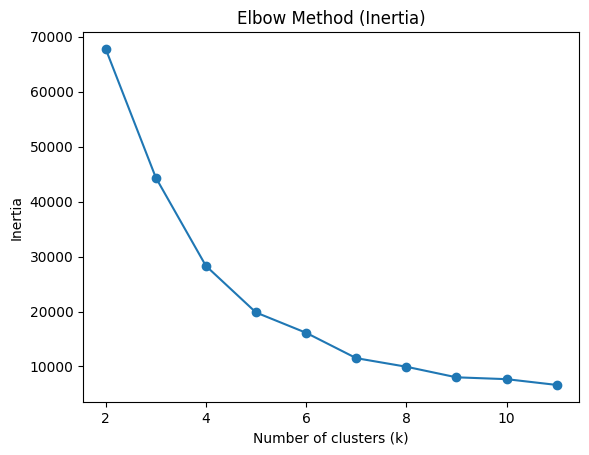

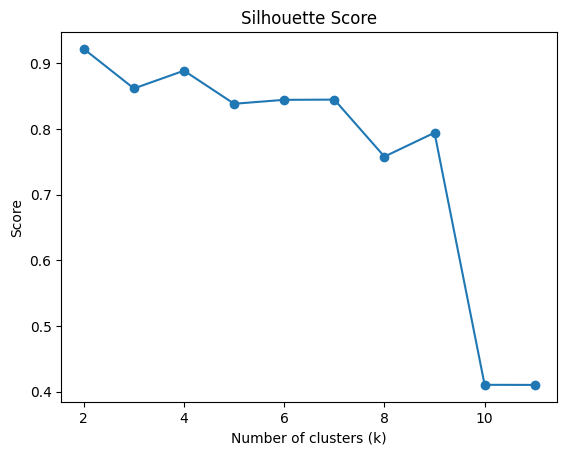

silhouette_score: 0.41025878838307
davies_bouldin_score: 0.7046561259038518
silhouette_score: 0.8615031491735679
davies_bouldin_score: 0.7963182235969489
cluster_km_robust
1    785
0     43
2     11
Name: count, dtype: int64
                       price   available         sold
cluster_km_robust                                    
0                  28.354419  101.511628  4439.069767
1                  46.380701    9.866242   226.149045
2                  25.932727  480.909091  3313.454545
eps=0.7, min_samples=5 → Sil=0.768, DBI=1.094
1
eps=0.7, min_samples=10 → Sil=0.737, DBI=1.144
1
eps=0.7, min_samples=15 → Sil=0.725, DBI=1.162
1
eps=1.0, min_samples=5 → Sil=0.689, DBI=1.391
2
eps=1.0, min_samples=10 → Sil=0.766, DBI=1.095
1
eps=1.0, min_samples=15 → Sil=0.753, DBI=1.117
1
eps=1.5, min_samples=5 → Sil=0.835, DBI=0.991
1
eps=1.5, min_samples=10 → Sil=0.694, DBI=1.345
2
eps=1.5, min_samples=15 → Sil=0.780, DBI=1.072
1
eps=2, min_samples=5 → Sil=0.772, DBI=1.634
2
eps=2, min_samples=10

In [62]:
num_features = ['price','available','sold']
cat_features = ['brand','type','itemLocation']

preprocessor_robust = ColumnTransformer([
    ('num', RobustScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

#PCA

X_robust = preprocessor_robust.fit_transform(df_unclean)
X_dense_robust = X_robust.toarray() if hasattr(X_robust, "toarray") else X_robust  # convert sparse → dense

pca_robust = PCA(n_components=0.95, random_state=42)  # keep 95% of variance
X_pca_robust = pca_robust.fit_transform(X_dense_robust)
print(f"PCA reduced dimensions from {X_dense_robust.shape[1]} to {X_pca_robust.shape[1]}")
best_k, best_sil = None, -1

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca_robust)
    sil = silhouette_score(X_pca_robust, labels)
    dbi = davies_bouldin_score(X_pca_robust, labels)
    print(f"k={k}: Sil={sil:.3f}, DBI={dbi:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

inertias = []
silhouettes = []
for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca_robust)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca_robust, km.labels_))

plt.plot(range(2, 12), inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
#plt.savefig("elbow.jpg", dpi =1000)
plt.show()
plt.plot(range(2, 12), silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

km_sil = silhouette_score(X_pca_robust, km.labels_)
km_dbi = davies_bouldin_score(X_pca_robust, km.labels_)
print("silhouette_score:",km_sil)
print("davies_bouldin_score:",km_dbi)

#============================================
# K Means
#============================================
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(X_pca_robust)
db_sil =silhouette_score(X_pca_robust, labels)
db_dbi =davies_bouldin_score(X_pca_robust, labels)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)
df_unclean['cluster_km_robust'] = km.fit_predict(X_pca_robust)
print(df_unclean['cluster_km_robust'].value_counts())
print(df_unclean.groupby('cluster_km_robust')[num_features].mean())

#============================================
# DBSCAN
#============================================
for eps in [ 0.7, 1.0,1.5,2]:
    for min_samples in [ 5, 10,15]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca_robust)
        # Skip if DBSCAN found only 1 cluster or all noise
        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_pca_robust, labels)
        dbi = davies_bouldin_score(X_pca_robust, labels)
        print(f"eps={eps}, min_samples={min_samples} → Sil={sil:.3f}, DBI={dbi:.3f}")
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(n_clusters)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_pca_robust)
db_sil =silhouette_score(X_pca_robust, db.labels_)
db_dbi =davies_bouldin_score(X_pca_robust, db.labels_)
print("silhouette_score:",db_sil)
print("davies_bouldin_score:",db_dbi)

df_unclean['cluster_db_robust'] = db.fit_predict(X_pca_robust)
print(df_unclean['cluster_db_robust'].value_counts())
print(df_unclean.groupby('cluster_db_robust')[num_features].mean())

#============================================
# Hierarchical
#============================================

for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = model.fit_predict(X_pca_robust)  ### label applying model
    sil = silhouette_score(X_pca_robust, labels)
    dbi = davies_bouldin_score(X_pca_robust, labels)
    print(f"{linkage}: Sil={sil:.3f}, DBI={dbi:.3f}")

agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
df_unclean['cluster_agg_robust'] = agg.fit_predict(X_pca_robust)
print(df_unclean['cluster_agg_robust'].value_counts())
print(df_unclean.groupby('cluster_agg_robust')[num_features].mean())

PCA

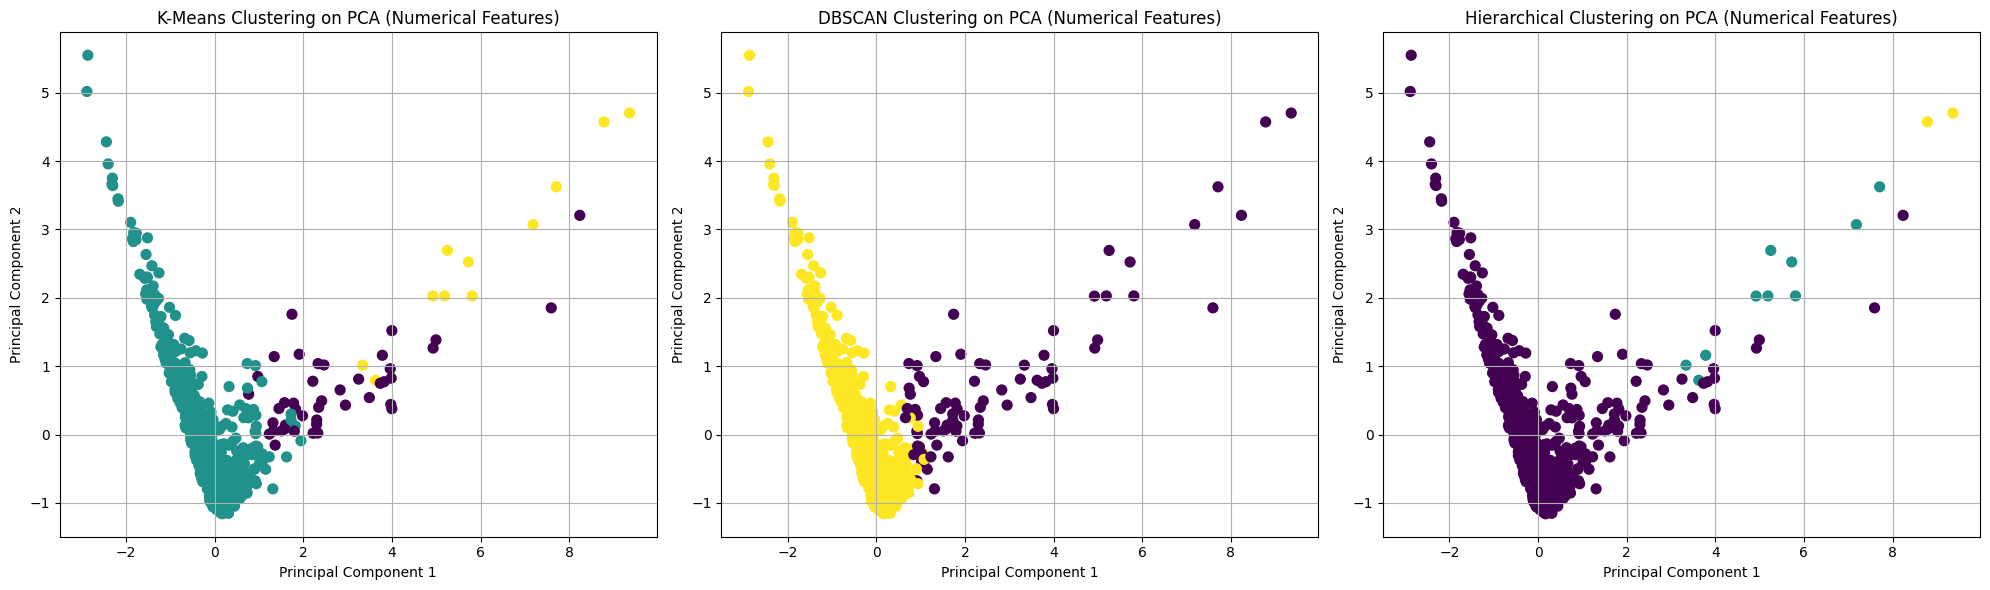

In [88]:
pca_plot_num = PCA(n_components=2, random_state=42)
X_pca_num = pca_plot_num.fit_transform(X_dense)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means Plot
axes[0].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df_unclean['cluster_km_robust'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering on PCA (Numerical Features)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# DBSCAN Plot
# For DBSCAN, cluster -1 represents noise points, which can be plotted in a distinct color
dbscan_labels = df_unclean['cluster_db_robust']
axes[1].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering on PCA (Numerical Features)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Hierarchical Clustering Plot
axes[2].scatter(X_pca_num[:, 0], X_pca_num[:, 1], c=df_unclean['cluster_agg_robust'], cmap='viridis', s=50)
axes[2].set_title('Hierarchical Clustering on PCA (Numerical Features)')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('pca_robust_unprocess.jpg', dpi = 1000)

In [231]:
xy.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,NaN,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"
